#Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Read Excel In

In [ ]:
og_data = pd.read_csv('/content/drive/MyDrive/Predictive Final Project/Original airbnb_listings_austin.csv')
og_data.head()

id                           listing_url  \
0    72635    https://www.airbnb.com/rooms/72635   
1  5386323  https://www.airbnb.com/rooms/5386323   
2  8826517  https://www.airbnb.com/rooms/8826517   
3  8828616  https://www.airbnb.com/rooms/8828616   
4  8536913  https://www.airbnb.com/rooms/8536913   

                             name  \
0   3 Private Bedrooms, SW Austin   
1                 Cricket Trailer   
2  Private room 1 in South Austin   
3  Private room 2 in South Austin   
4       Brand-New 3BR Austin Home   

                                             summary  \
0  Conveniently located 10-15 from downtown in SW...   
1  Rent this cool concept trailer that has everyt...   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4  Brand-new 3BR/2BA Austin home with landscaped ...   

                                               space  \
0  We have three spare bedrooms, each with a quee...   
1  Rental arrangements for this trailer allows yo...   
2                                                NaN   
3                                                NaN   
4  Feel instantly at home at our brand new 3BR/2B...   

                                         description experiences_offered  \
0  Conveniently located 10-15 from downtown in SW...                none   
1  Rent this cool concept trailer that has everyt...                none   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...                none   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...                none   
4  Brand-new 3BR/2BA Austin home with landscaped ...                none   

                               neighborhood_overview notes  \
0  Location and convenience are key.  Easy access...   NaN   
1  We're talking about wherever you'd like in the...   NaN   
2                                                NaN   NaN   
3                                                NaN   NaN   
4  Entertainment and activities are plentiful her...   NaN   

                                             transit  ...  number_of_reviews  \
0  Unfortunately there is no convenient public tr...  ...                  1   
1  Bike, Bus, Metrorail, etc. you name it we've g...  ...                  0   
2                                                NaN  ...                  0   
3                                                NaN  ...                  0   
4                                                NaN  ...                  0   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                100.0                   10.0                      10.0   
1                  NaN                    NaN                       NaN   
2                  NaN                    NaN                       NaN   
3                  NaN                    NaN                       NaN   
4                  NaN                    NaN                       NaN   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  10.0                        10.0                   10.0   
1                   NaN                         NaN                    NaN   
2                   NaN                         NaN                    NaN   
3                   NaN                         NaN                    NaN   
4                   NaN                         NaN                    NaN   

  review_scores_value  instant_bookable cancellation_policy  
0                10.0                 f            moderate  
1                 NaN                 f            moderate  
2                 NaN                 f            flexible  
3                 NaN                 f            flexible  
4                 NaN                 f              strict  

[5 rows x 54 columns]

#Cleaning

##Drop Columns We don't Want

In [ ]:
og_data.columns

Index(['id', 'listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'host_id', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_is_superhost',
       'host_listings_count', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price', 'weekly_price', 'security_deposit', 'cleaning_fee',
       'guests_included', 'extra_people', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'in

In [ ]:
og_data.drop(['id','listing_url','name','host_id','host_name'], axis=1, inplace=True)

In [ ]:
og_data.head()

summary  \
0  Conveniently located 10-15 from downtown in SW...   
1  Rent this cool concept trailer that has everyt...   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4  Brand-new 3BR/2BA Austin home with landscaped ...   

                                               space  \
0  We have three spare bedrooms, each with a quee...   
1  Rental arrangements for this trailer allows yo...   
2                                                NaN   
3                                                NaN   
4  Feel instantly at home at our brand new 3BR/2B...   

                                         description experiences_offered  \
0  Conveniently located 10-15 from downtown in SW...                none   
1  Rent this cool concept trailer that has everyt...                none   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...                none   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...                none   
4  Brand-new 3BR/2BA Austin home with landscaped ...                none   

                               neighborhood_overview notes  \
0  Location and convenience are key.  Easy access...   NaN   
1  We're talking about wherever you'd like in the...   NaN   
2                                                NaN   NaN   
3                                                NaN   NaN   
4  Entertainment and activities are plentiful her...   NaN   

                                             transit  host_since  \
0  Unfortunately there is no convenient public tr...    2/4/2011   
1  Bike, Bus, Metrorail, etc. you name it we've g...   2/17/2015   
2                                                NaN  10/10/2015   
3                                                NaN  10/10/2015   
4                                                NaN   4/13/2015   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4                            US   

                                          host_about  ... number_of_reviews  \
0           Private music loving family in SW Austin  ...                 1   
1         Family man that loves the great outdoors.   ...                 0   
2  My wife Michele and I are recent "empty nester...  ...                 0   
3  My wife Michele and I are recent "empty nester...  ...                 0   
4                                                NaN  ...                 0   

  review_scores_rating review_scores_accuracy  review_scores_cleanliness  \
0                100.0                   10.0                       10.0   
1                  NaN                    NaN                        NaN   
2                  NaN                    NaN                        NaN   
3                  NaN                    NaN                        NaN   
4                  NaN                    NaN                        NaN   

  review_scores_checkin review_scores_communication review_scores_location  \
0                  10.0                        10.0                   10.0   
1                   NaN                         NaN                    NaN   
2                   NaN                         NaN                    NaN   
3                   NaN                         NaN                    NaN   
4                   NaN                         NaN                    NaN   

  review_scores_value instant_bookable cancellation_policy  
0                10.0                f            moderate  
1                 NaN                f            moderate  
2                 NaN                f            flexible  
3                 NaN                f            flexible  
4                 NaN                f              strict  

[5 rows x 49 columns]

In [ ]:
og_data['booked'] = og_data['availability_90'] < (0.4*90)

In [ ]:
og_data['booked'] = og_data['booked'].astype(int)

In [ ]:
og_data.head()

summary  \
0  Conveniently located 10-15 from downtown in SW...   
1  Rent this cool concept trailer that has everyt...   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4  Brand-new 3BR/2BA Austin home with landscaped ...   

                                               space  \
0  We have three spare bedrooms, each with a quee...   
1  Rental arrangements for this trailer allows yo...   
2                                                NaN   
3                                                NaN   
4  Feel instantly at home at our brand new 3BR/2B...   

                                         description experiences_offered  \
0  Conveniently located 10-15 from downtown in SW...                none   
1  Rent this cool concept trailer that has everyt...                none   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...                none   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...                none   
4  Brand-new 3BR/2BA Austin home with landscaped ...                none   

                               neighborhood_overview notes  \
0  Location and convenience are key.  Easy access...   NaN   
1  We're talking about wherever you'd like in the...   NaN   
2                                                NaN   NaN   
3                                                NaN   NaN   
4  Entertainment and activities are plentiful her...   NaN   

                                             transit  host_since  \
0  Unfortunately there is no convenient public tr...    2/4/2011   
1  Bike, Bus, Metrorail, etc. you name it we've g...   2/17/2015   
2                                                NaN  10/10/2015   
3                                                NaN  10/10/2015   
4                                                NaN   4/13/2015   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4                            US   

                                          host_about  ...  \
0           Private music loving family in SW Austin  ...   
1         Family man that loves the great outdoors.   ...   
2  My wife Michele and I are recent "empty nester...  ...   
3  My wife Michele and I are recent "empty nester...  ...   
4                                                NaN  ...   

  review_scores_rating review_scores_accuracy review_scores_cleanliness  \
0                100.0                   10.0                      10.0   
1                  NaN                    NaN                       NaN   
2                  NaN                    NaN                       NaN   
3                  NaN                    NaN                       NaN   
4                  NaN                    NaN                       NaN   

   review_scores_checkin review_scores_communication review_scores_location  \
0                   10.0                        10.0                   10.0   
1                    NaN                         NaN                    NaN   
2                    NaN                         NaN                    NaN   
3                    NaN                         NaN                    NaN   
4                    NaN                         NaN                    NaN   

  review_scores_value instant_bookable cancellation_policy booked  
0                10.0                f            moderate      1  
1                 NaN                f            moderate      0  
2                 NaN                f            flexible      0  
3                 NaN                f            flexible      0  
4                 NaN                f              strict      0  

[5 rows x 50 columns]

In [ ]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   summary                      5373 non-null   object 
 1   space                        4475 non-null   object 
 2   description                  5832 non-null   object 
 3   experiences_offered          5835 non-null   object 
 4   neighborhood_overview        3572 non-null   object 
 5   notes                        2412 non-null   object 
 6   transit                      3492 non-null   object 
 7   host_since                   5820 non-null   object 
 8   host_location                5810 non-null   object 
 9   host_about                   3974 non-null   object 
 10  host_response_time           4177 non-null   object 
 11  host_response_rate           4177 non-null   object 
 12  host_is_superhost            5820 non-null   object 
 13  host_listings_coun

In [ ]:
og_data.isnull().sum()

summary                         462
space                          1360
description                       3
experiences_offered               0
neighborhood_overview          2263
notes                          3423
transit                        2343
host_since                       15
host_location                    25
host_about                     1861
host_response_time             1658
host_response_rate             1658
host_is_superhost                15
host_listings_count              15
host_has_profile_pic             15
host_identity_verified           15
neighbourhood                  1035
city                              0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                        46
bedrooms                          6
beds                             23
bed_type                          0
amenities                         0
square_feet                    5533
price                       

In [ ]:
og_data['cleaning_fee'] = og_data['cleaning_fee'].replace('[\$,.%]', '', regex=True).astype(float)
og_data['host_response_rate'] = og_data['host_response_rate'].replace('[\$,.%]', '', regex=True).astype(float)
og_data['price'] = og_data['price'].replace('[\$,.%]', '', regex=True).astype(float)

In [ ]:
og_data['host_since']= pd.to_datetime(og_data['host_since'])

In [ ]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   summary                      5373 non-null   object        
 1   space                        4475 non-null   object        
 2   description                  5832 non-null   object        
 3   experiences_offered          5835 non-null   object        
 4   neighborhood_overview        3572 non-null   object        
 5   notes                        2412 non-null   object        
 6   transit                      3492 non-null   object        
 7   host_since                   5820 non-null   datetime64[ns]
 8   host_location                5810 non-null   object        
 9   host_about                   3974 non-null   object        
 10  host_response_time           4177 non-null   object        
 11  host_response_rate           4177 non-null 

In [ ]:
number_columns = ['host_response_rate','host_listings_count','bathrooms','bedrooms',
                       'beds','square_feet','price','cleaning_fee','review_scores_rating', 'review_scores_accuracy',
                       'review_scores_cleanliness', 'review_scores_checkin',
                       'review_scores_communication', 'review_scores_location',
                       'review_scores_value']

In [ ]:
og_data[number_columns] = og_data[number_columns].fillna(og_data[number_columns].mean())

In [ ]:
cat_columns1 = ['host_response_rate','host_response_time']

In [ ]:
og_data[cat_columns1] = og_data[cat_columns1].fillna('N/A')

In [ ]:
cat_columns2 = ['summary','space','description','neighborhood_overview','notes', 'transit','host_since',
        'host_location', 'host_about','host_is_superhost','host_has_profile_pic', 'host_identity_verified',
        'neighbourhood','weekly_price', 'security_deposit', 'cleaning_fee']

In [ ]:
og_data[cat_columns2] = og_data[cat_columns2].fillna('Missing')

In [ ]:
og_data.isnull().sum()

summary                        0
space                          0
description                    0
experiences_offered            0
neighborhood_overview          0
notes                          0
transit                        0
host_since                     0
host_location                  0
host_about                     0
host_response_time             0
host_response_rate             0
host_is_superhost              0
host_listings_count            0
host_has_profile_pic           0
host_identity_verified         0
neighbourhood                  0
city                           0
property_type                  0
room_type                      0
accommodates                   0
bathrooms                      0
bedrooms                       0
beds                           0
bed_type                       0
amenities                      0
square_feet                    0
price                          0
weekly_price                   0
security_deposit               0
cleaning_f

In [ ]:
og_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   summary                      5835 non-null   object 
 1   space                        5835 non-null   object 
 2   description                  5835 non-null   object 
 3   experiences_offered          5835 non-null   object 
 4   neighborhood_overview        5835 non-null   object 
 5   notes                        5835 non-null   object 
 6   transit                      5835 non-null   object 
 7   host_since                   5835 non-null   object 
 8   host_location                5835 non-null   object 
 9   host_about                   5835 non-null   object 
 10  host_response_time           5835 non-null   object 
 11  host_response_rate           5835 non-null   float64
 12  host_is_superhost            5835 non-null   object 
 13  host_listings_coun

In [ ]:
clean_data=og_data
clean_data.head()

summary  \
0  Conveniently located 10-15 from downtown in SW...   
1  Rent this cool concept trailer that has everyt...   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...   
4  Brand-new 3BR/2BA Austin home with landscaped ...   

                                               space  \
0  We have three spare bedrooms, each with a quee...   
1  Rental arrangements for this trailer allows yo...   
2                                            Missing   
3                                            Missing   
4  Feel instantly at home at our brand new 3BR/2B...   

                                         description experiences_offered  \
0  Conveniently located 10-15 from downtown in SW...                none   
1  Rent this cool concept trailer that has everyt...                none   
2  Upstairs, private, 12ft x 13 1/2ft room.  Priv...                none   
3  Upstairs, private, 11ft x 13 1/2ft room.  Priv...                none   
4  Brand-new 3BR/2BA Austin home with landscaped ...                none   

                               neighborhood_overview    notes  \
0  Location and convenience are key.  Easy access...  Missing   
1  We're talking about wherever you'd like in the...  Missing   
2                                            Missing  Missing   
3                                            Missing  Missing   
4  Entertainment and activities are plentiful her...  Missing   

                                             transit           host_since  \
0  Unfortunately there is no convenient public tr...  2011-02-04 00:00:00   
1  Bike, Bus, Metrorail, etc. you name it we've g...  2015-02-17 00:00:00   
2                                            Missing  2015-10-10 00:00:00   
3                                            Missing  2015-10-10 00:00:00   
4                                            Missing  2015-04-13 00:00:00   

                  host_location  \
0  Austin, Texas, United States   
1  Austin, Texas, United States   
2  Austin, Texas, United States   
3  Austin, Texas, United States   
4                            US   

                                          host_about  ...  \
0           Private music loving family in SW Austin  ...   
1         Family man that loves the great outdoors.   ...   
2  My wife Michele and I are recent "empty nester...  ...   
3  My wife Michele and I are recent "empty nester...  ...   
4                                            Missing  ...   

  review_scores_rating  review_scores_accuracy review_scores_cleanliness  \
0           100.000000               10.000000                 10.000000   
1            95.435735                9.645657                  9.515881   
2            95.435735                9.645657                  9.515881   
3            95.435735                9.645657                  9.515881   
4            95.435735                9.645657                  9.515881   

   review_scores_checkin review_scores_communication review_scores_location  \
0              10.000000                   10.000000              10.000000   
1               9.830863                    9.839068               9.468378   
2               9.830863                    9.839068               9.468378   
3               9.830863                    9.839068               9.468378   
4               9.830863                    9.839068               9.468378   

  review_scores_value instant_bookable cancellation_policy booked  
0           10.000000                f            moderate      1  
1            9.416093                f            moderate      0  
2            9.416093                f            flexible      0  
3            9.416093                f            flexible      0  
4            9.416093                f              strict      0  

[5 rows x 50 columns]

#Exploratory Analysis

##Correlation Heat Map

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima.model import ARIMAResults
from scipy.signal import detrend


<ipython-input-312-85d54aae1b00>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cormat = explore1.corr()


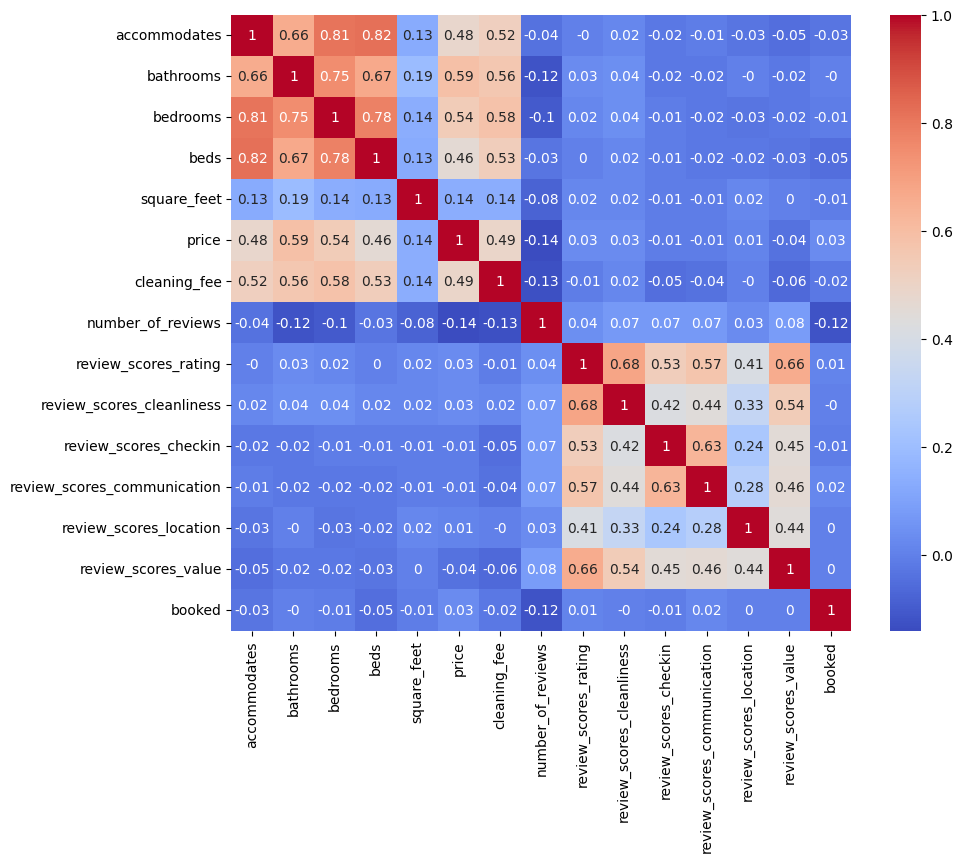

In [ ]:
explore1 = clean_data.drop(columns=['experiences_offered', 'host_since', 'host_about', 'host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'city', 'guests_included', 'extra_people', 'minimum_nights', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'review_scores_accuracy', 'instant_bookable', 'cancellation_policy'])


# Compute correlations
cormat = explore1.corr()

# Round correlation matrix to 2 decimal places
cormat = cormat.round(2)

# Plot correlation matrix using a heatmap
plt.figure(figsize = (10,8))
sns.heatmap(cormat,annot=True, cmap = 'coolwarm')
plt.show()

##Word Cloud

##Summary Column

In [ ]:
import nltk
from nltk.util import ngrams
from nltk import bigrams
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import string
from textblob import TextBlob
from wordcloud import WordCloud

In [ ]:
# dlownload nltk datasets
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Define the stop words to remove
stop_words = set(stopwords.words('english'))

# Convert the set to a DataFrame
stopwords_df = pd.DataFrame(list(stop_words), columns=['stopword'])
print("There are {} words in the stopword list here is a sample: \n {}".format(stopwords_df.shape[0],list(stop_words)[0:4]))
stop_words

There are 179 words in the stopword list here is a sample: 
 ['between', 'under', 'ain', 'during']


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
exclude_words = ["t.co", "https", "rt","iphone", "amp", "android", "it's", " ", "_", "-"]

exclude_df = pd.DataFrame(list(exclude_words), columns=['stopword'])
exclude_df

stopword
0     t.co
1    https
2       rt
3   iphone
4      amp
5  android
6     it's
7         
8        _
9        -

In [ ]:
term_df = (clean_data['summary']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .reset_index(drop=True)
             .to_frame('term')
          )
term_df.head(10)

<ipython-input-317-1377b7a518eb>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(f"[{string.punctuation}]", "") # Remove punctuation


term
0  conveniently
1       located
2          1015
3          from
4      downtown
5            in
6            sw
7        austin
8        within
9       walking

In [ ]:
term_freq_w_junk = (term_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
term_freq_w_junk

term  freq
0            and  8227
1            the  6346
2             to  6043
3              a  5827
4             in  4481
...          ...   ...
8273       miele     1
8274    cableand     1
8275        mild     1
8276  cabinstyle     1
8277           ️     1

[8278 rows x 2 columns]

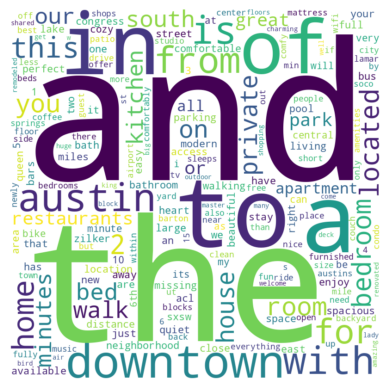

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_w_junk_dict = dict(zip(term_freq_w_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_w_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# concatenate to one dataframe
excludes_stopwords = pd.concat([stopwords_df,exclude_df],axis=0)

# normalize the strings in the term_freq_w_junk dataframe
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.normalize('NFKD')
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.strip()

# Remove stop words and excludes from the DataFrame
term_freq_wo_junk = (term_freq_w_junk
             .merge(excludes_stopwords, how='left', left_on='term', right_on='stopword')
             .query("stopword.isna()")
             .drop(['stopword'], axis=1)
            )

term_freq_wo_junk

term  freq
6       downtown  3035
7         austin  2911
13          home  1629
15             2  1415
16       bedroom  1290
...          ...   ...
8273       miele     1
8274    cableand     1
8275        mild     1
8276  cabinstyle     1
8277           ️     1

[8149 rows x 2 columns]

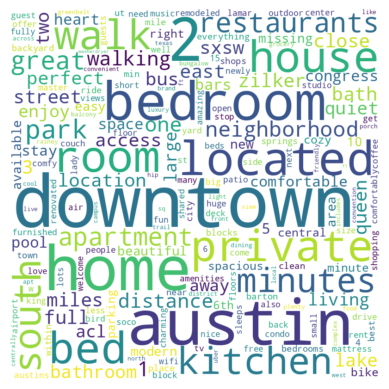

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_wo_junk_dict = dict(zip(term_freq_wo_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_wo_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Transit Column

In [ ]:
term_df = (clean_data['summary']
             .str.lower()
             .str.strip() # remove leading and trailing spaces
             .str.normalize('NFKD') # string encodings
             .str.split() # make a list of text
             .explode() # create rows of words
             .str.replace(f"[{string.punctuation}]", "") # Remove punctuation
             .reset_index(drop=True)
             .to_frame('term')
          )
term_df.head(10)

<ipython-input-322-1377b7a518eb>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  .str.replace(f"[{string.punctuation}]", "") # Remove punctuation


term
0  conveniently
1       located
2          1015
3          from
4      downtown
5            in
6            sw
7        austin
8        within
9       walking

In [ ]:
term_freq_w_junk = (term_df
            .groupby("term")
            .size()
            .reset_index()
            .rename(columns={0: "freq"})
            .sort_values("freq", ascending=False)
            .dropna()
            .reset_index(drop=True)
            )
term_freq_w_junk

term  freq
0            and  8227
1            the  6346
2             to  6043
3              a  5827
4             in  4481
...          ...   ...
8273       miele     1
8274    cableand     1
8275        mild     1
8276  cabinstyle     1
8277           ️     1

[8278 rows x 2 columns]

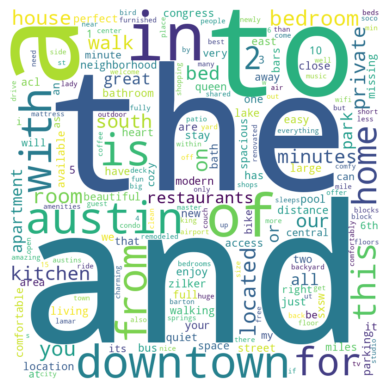

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_w_junk_dict = dict(zip(term_freq_w_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_w_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# concatenate to one dataframe
excludes_stopwords = pd.concat([stopwords_df,exclude_df],axis=0)

# normalize the strings in the term_freq_w_junk dataframe
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.normalize('NFKD')
excludes_stopwords['stopword'] = excludes_stopwords['stopword'].str.strip()

# Remove stop words and excludes from the DataFrame
term_freq_wo_junk = (term_freq_w_junk
             .merge(excludes_stopwords, how='left', left_on='term', right_on='stopword')
             .query("stopword.isna()")
             .drop(['stopword'], axis=1)
            )

term_freq_wo_junk

term  freq
6       downtown  3035
7         austin  2911
13          home  1629
15             2  1415
16       bedroom  1290
...          ...   ...
8273       miele     1
8274    cableand     1
8275        mild     1
8276  cabinstyle     1
8277           ️     1

[8149 rows x 2 columns]

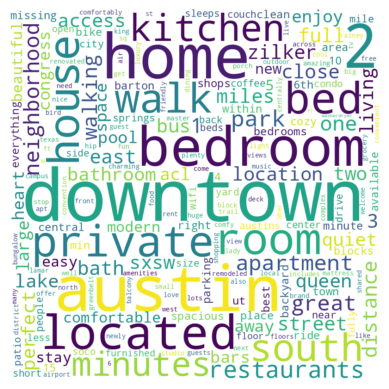

In [ ]:
# Create a dictionary of terms and frequencies
term_freq_wo_junk_dict = dict(zip(term_freq_wo_junk['term'], term_freq_w_junk['freq']))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate_from_frequencies(term_freq_wo_junk_dict)

# Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

#Austin Rental Market Analysis

#Linear Regression(Question 1)

In [ ]:
numeric_columns = clean_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'booked'],
      dtype='object')

In [ ]:
new_numbers_columns = ['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'booked']

In [ ]:
# Fit full regression
X = clean_data[new_numbers_columns].drop(columns=['price'])
y = clean_data['price']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X.astype(float)).fit()

# Display regression summary
print(fullreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.422
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     184.6
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:49:36   Log-Likelihood:                -68557.
No. Observations:                5835   AIC:                         1.372e+05
Df Residuals:                    5811   BIC:                         1.373e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


                       Variable         VIF
0                         const  801.328059
1            host_response_rate    1.027426
2           host_listings_count    1.162848
3                  accommodates    4.134234
4                     bathrooms    2.579738
5                      bedrooms    4.182493
6                          beds    3.672766
7                   square_feet    1.046312
8                  cleaning_fee    1.706594
9               guests_included    1.326282
10               minimum_nights    1.008279
11              availability_30   14.662404
12              availability_60   48.291794
13              availability_90   37.384409
14             availability_365    2.127372
15            number_of_reviews    1.124042
16         review_scores_rating    2.867389
17       review_scores_accuracy    1.955559
18    review_scores_cleanliness    2.035943
19        review_scores_checkin    1.857201
20  review_scores_communication    1.968495
21       review_scores_location 

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [ ]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  accommodates with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bathrooms with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  const with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  cleaning_fee with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  guests_included with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  host_listings_count with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  bedrooms with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  number_of_reviews with p-value 0.0000


<ipython-input-332-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['accommodates', 'bathrooms', 'const', 'cleaning_fee', 'guests_included', 'host_listings_count', 'bedrooms', 'number_of_reviews']


In [ ]:
# Fit stepwise regression
X = clean_data[['cleaning_fee', 'bathrooms', 'bedrooms', 'guests_included', 'host_listings_count', 'number_of_reviews', 'accommodates']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     589.4
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:49:40   Log-Likelihood:                -68595.
No. Observations:                5835   AIC:                         1.372e+05
Df Residuals:                    5827   BIC:                         1.373e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -2.11e+04    

In [ ]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


              Variable       VIF
0                const  6.051653
1         cleaning_fee  1.670317
2            bathrooms  2.491907
3             bedrooms  3.949097
4      guests_included  1.302972
5  host_listings_count  1.105730
6    number_of_reviews  1.036755
7         accommodates  3.160943


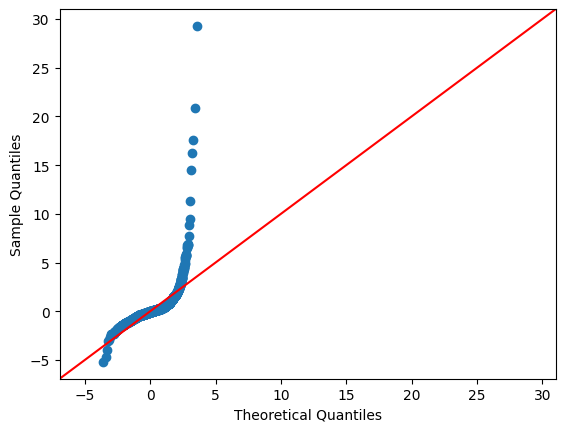

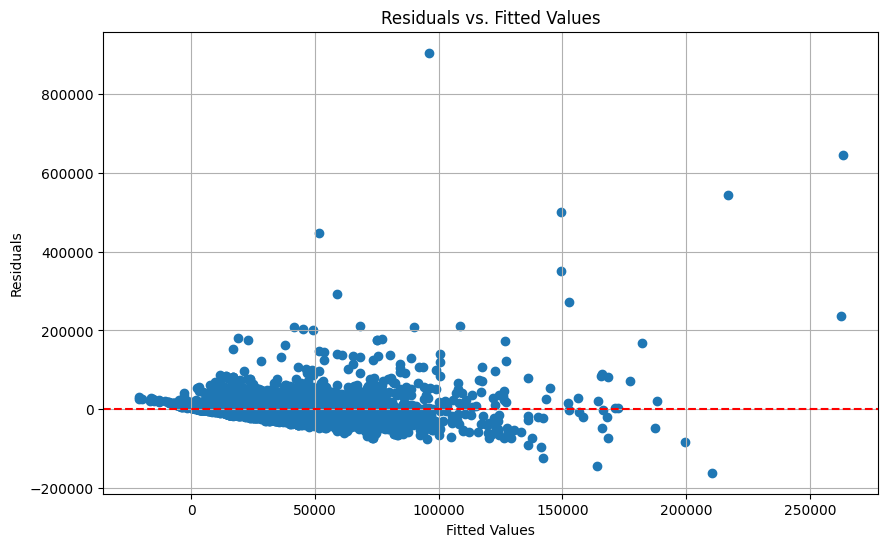

In [ ]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
# Square Root transformed regression
X = clean_data[['cleaning_fee', 'bathrooms', 'bedrooms', 'guests_included', 'host_listings_count', 'number_of_reviews', 'accommodates']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     932.0
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:49:41   Log-Likelihood:                -31511.
No. Observations:                5835   AIC:                         6.304e+04
Df Residuals:                    5827   BIC:                         6.309e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  44.0039    

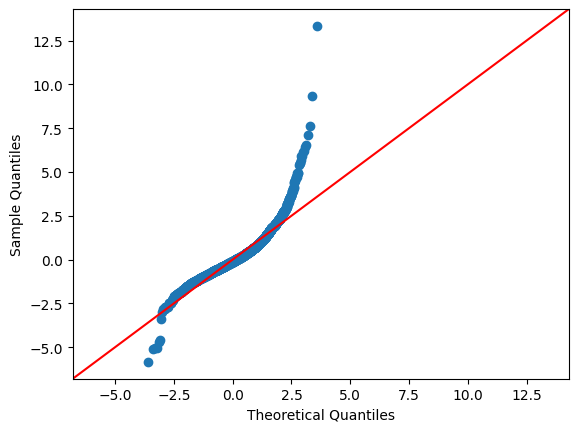

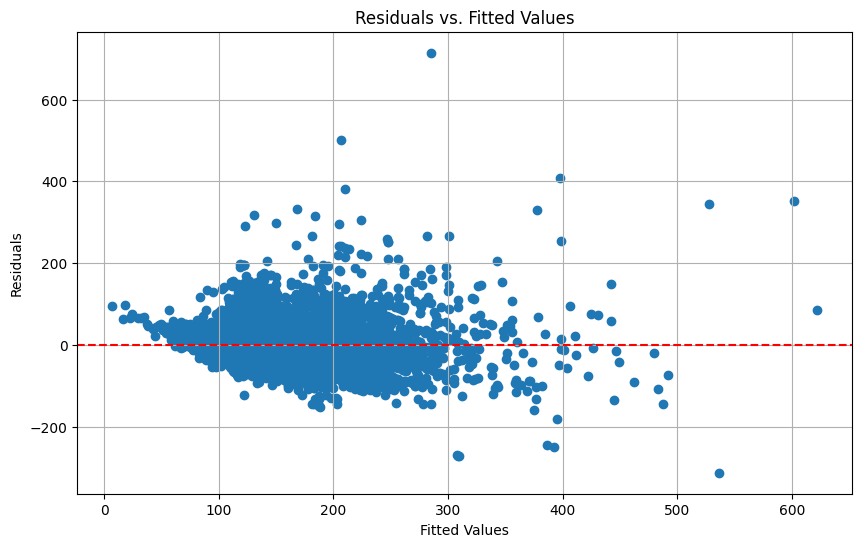

In [ ]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
clean_data.columns

Index(['summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'weekly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'booke

In [ ]:
# sqrt transformed regression including categorical variables
X = clean_data[['cleaning_fee', 'bathrooms', 'bedrooms', 'guests_included', 'host_listings_count', 'number_of_reviews', 'accommodates','instant_bookable', 'room_type','neighbourhood']]
X = pd.get_dummies(X, columns=['instant_bookable', 'room_type','neighbourhood'], drop_first=True)
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.603
Model:                            OLS   Adj. R-squared:                  0.597
Method:                 Least Squares   F-statistic:                     97.91
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        02:49:41   Log-Likelihood:                -31010.
No. Observations:                5835   AIC:                         6.220e+04
Df Residuals:                    5745   BIC:                         6.280e+04
Df Model:                          89                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

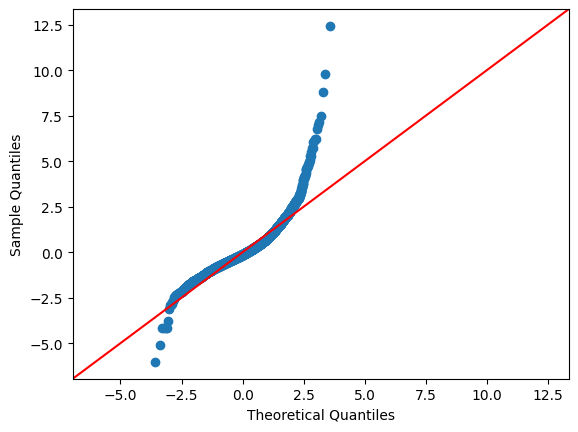

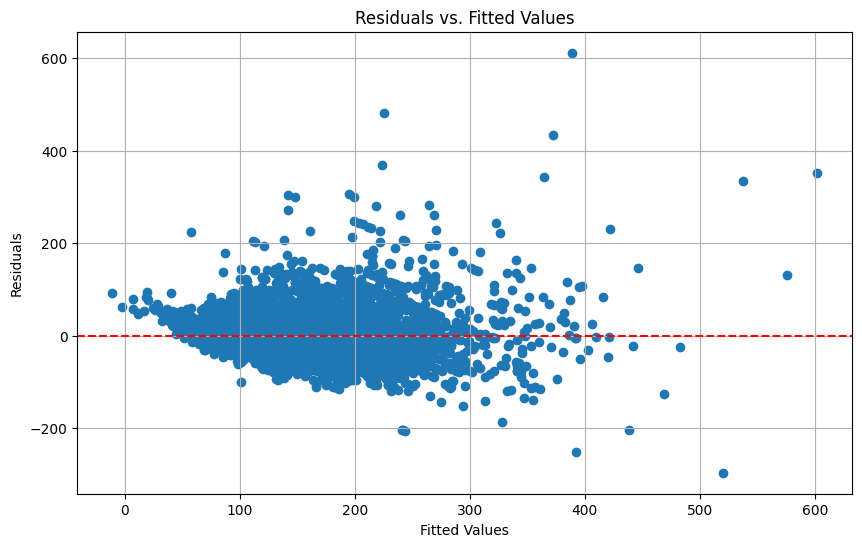

In [ ]:
# Calculate residuals
residuals = sqrtreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

#L1 Logistic Regression Regularization Test (Question 2)

In [ ]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   summary                      5835 non-null   object 
 1   space                        5835 non-null   object 
 2   description                  5835 non-null   object 
 3   experiences_offered          5835 non-null   object 
 4   neighborhood_overview        5835 non-null   object 
 5   notes                        5835 non-null   object 
 6   transit                      5835 non-null   object 
 7   host_since                   5835 non-null   object 
 8   host_location                5835 non-null   object 
 9   host_about                   5835 non-null   object 
 10  host_response_time           5835 non-null   object 
 11  host_response_rate           5835 non-null   float64
 12  host_is_superhost            5835 non-null   object 
 13  host_listings_coun

In [ ]:
clean_data.columns

Index(['summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'weekly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'instant_bookable', 'cancellation_policy',
       'booke

In [ ]:
cat_columns = clean_data.select_dtypes(include=['object']).columns
cat_columns

Index(['summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'city', 'property_type', 'room_type', 'bed_type',
       'amenities', 'weekly_price', 'security_deposit', 'extra_people',
       'has_availability', 'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [ ]:
clean_data2= clean_data

# drop unnecessary columns
#df_cleaned.drop(['id', 'name','host_name', 'listing_url', 'host_location', 'summary','space','description',
#         'neighborhood_overview','notes','transit','host_id','host_name','square_feet','weekly_price',
#         'host_about','security_deposit','amenities','experiences_offered','host_has_profile_pic','host_response_rate'], axis=1, inplace=True)

In [ ]:
clean_data2.drop(['summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'host_since',
       'host_location', 'host_about', 'host_response_time', 'weekly_price', 'security_deposit', 'extra_people',], axis=1, inplace=True)

In [ ]:
clean_data2.head()

host_response_rate host_is_superhost  host_listings_count  \
0           93.497247                 f                  1.0   
1           93.497247                 f                  1.0   
2           93.497247                 f                  2.0   
3           93.497247                 f                  2.0   
4           98.000000                 f                301.0   

  host_has_profile_pic host_identity_verified neighbourhood    city  \
0                    t                      f      Circle C  Austin   
1                    t                      t      Circle C  Austin   
2                    t                      t       Missing  Austin   
3                    t                      t       Missing  Austin   
4                    t                      t       Missing  Austin   

  property_type        room_type  accommodates  ...  review_scores_rating  \
0         House     Private room             6  ...            100.000000   
1     Camper/RV     Private room             2  ...             95.435735   
2         House     Private room             2  ...             95.435735   
3         House     Private room             2  ...             95.435735   
4         House  Entire home/apt             6  ...             95.435735   

   review_scores_accuracy  review_scores_cleanliness review_scores_checkin  \
0               10.000000                  10.000000             10.000000   
1                9.645657                   9.515881              9.830863   
2                9.645657                   9.515881              9.830863   
3                9.645657                   9.515881              9.830863   
4                9.645657                   9.515881              9.830863   

  review_scores_communication  review_scores_location  review_scores_value  \
0                   10.000000               10.000000            10.000000   
1                    9.839068                9.468378             9.416093   
2                    9.839068                9.468378             9.416093   
3                    9.839068                9.468378             9.416093   
4                    9.839068                9.468378             9.416093   

   instant_bookable  cancellation_policy  booked  
0                 f             moderate       1  
1                 f             moderate       0  
2                 f             flexible       0  
3                 f             flexible       0  
4                 f               strict       0  

[5 rows x 36 columns]

In [ ]:
X = clean_data2.drop('booked', axis=1)
y = clean_data2['booked']

# Convert categorical variables to dummy/indicator variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an Instance of Logistic Regression for LASSO Selection  using c = 0.1 and c = 0.01
lr_l1_1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lr_l1_01 = LogisticRegression(penalty='l1', solver='liblinear', C=0.01)

# fit the models to the training data
lr_l1_1.fit(X_train, y_train)
lr_l1_01.fit(X_train, y_train)

# Create an Instance of Logistic Regression for Ridge Regression (L2 regularization)
lr_l2 = LogisticRegression(penalty='l2', solver='liblinear')

# Create an instance of Logistic Regression for Elastic Net
#lr_l12 = LogisticRegression(penalty='elasticnet', l1_ratio=0.5, solver='saga')

# fit the models to the training data
lr_l2.fit(X_train, y_train)
#lr_l12.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# function for model coefficents
def rpt_model_variables(model):
    # Get the intercept term
    intercept = model.intercept_

    # Access the coefficients (weights) of the model, i rounded them
    coefficients = np.round(model.coef_[0],decimals=4)

    # Create DataFrames for intercept and coefficients
    df_intercept = pd.DataFrame({'feature': ['Intercept'], 'coefficient': [intercept[0]]})
    df_coefficients = pd.DataFrame({'feature': X.columns, 'coefficient': coefficients})
    df_coefficients['abs_coefficient'] = df_coefficients['coefficient'].abs()
    df_coefficients.sort_values(by='abs_coefficient', ascending=False, inplace=True)

    # Print the DataFrame
    print(df_coefficients)

    return df_coefficients

df_coefficients1 = rpt_model_variables(lr_l1_1)
df_coefficients01 = rpt_model_variables(lr_l1_01)
df_coefficients2 = rpt_model_variables(lr_l2)
#df_coefficients12 = rpt_model_variables(lr_l12)

                                                feature  coefficient  \
19                                review_scores_checkin       0.7381   
13                                      availability_90      -0.7034   
20                          review_scores_communication       0.4824   
21                               review_scores_location       0.1893   
17                               review_scores_accuracy       0.0958   
...                                                 ...          ...   
1550  amenities_{TV,"Cable TV",Internet,"Air Conditi...       0.0000   
1549  amenities_{TV,"Cable TV",Internet,"Air Conditi...       0.0000   
1548  amenities_{TV,"Cable TV",Internet,"Air Conditi...       0.0000   
1547  amenities_{TV,"Cable TV",Internet,"Air Conditi...       0.0000   
4631                cancellation_policy_super_strict_30       0.0000   

      abs_coefficient  
19             0.7381  
13             0.7034  
20             0.4824  
21             0.1893  
17             

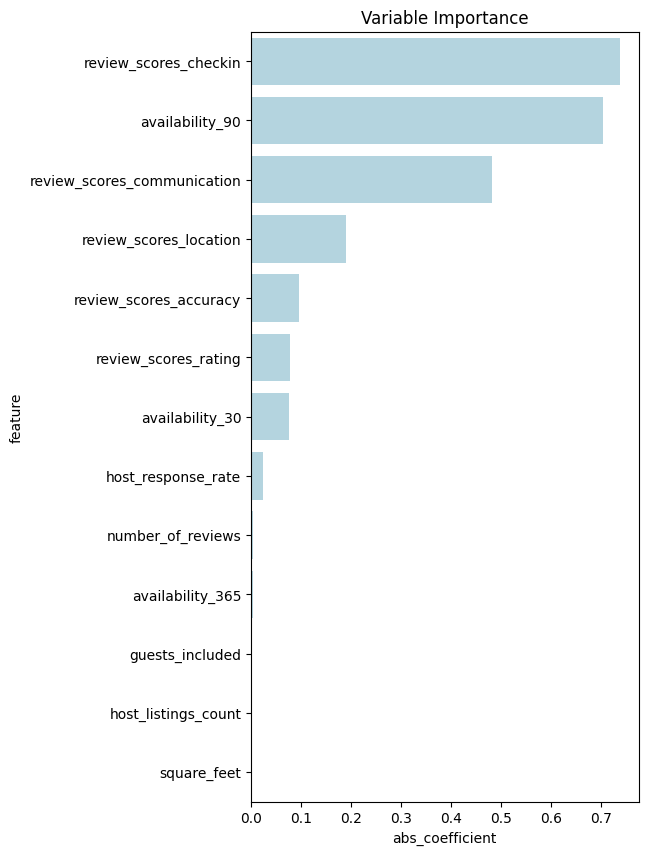

-- rejected --
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Cat(s),"Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector",Essentials,Shampoo}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Other pet(s)","Indoor Fireplace",Heating,Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Indoor Fireplace",Heating,"Family/Kid Friendly","Suitable for Events",Washer,Dryer,"Smoke Detector",Essentials,Shampoo}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Elevator in Building","Buzzer/Wireless Intercom",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Fire Extinguisher",Essentials

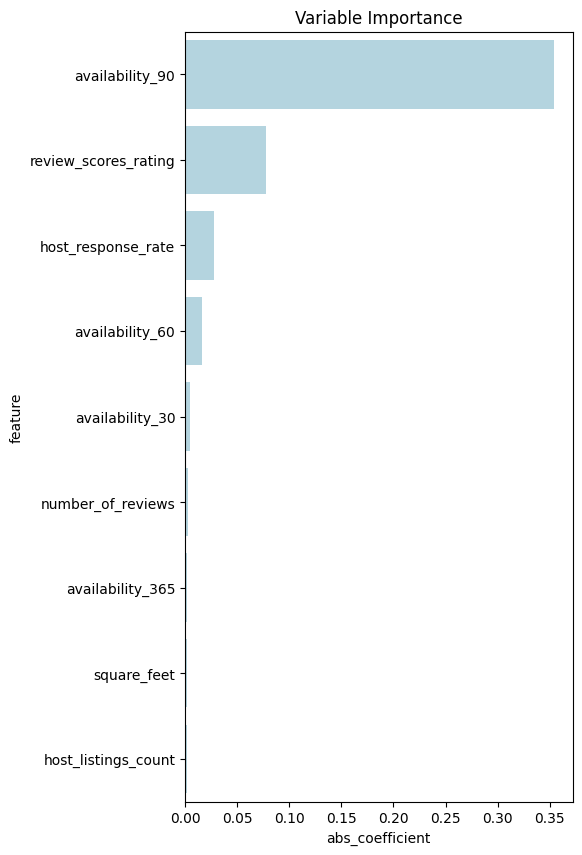

-- rejected --
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Cat(s),Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","Fire Extinguisher",Essentials}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Indoor Fireplace",Heating,"Family/Kid Friendly","Suitable for Events",Washer,Dryer,"Smoke Detector",Essentials,Shampoo}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Elevator in Building","Buzzer/Wireless Intercom",Heating,Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Fire Extinguisher",Essentials}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),"Buzzer/Wireless Intercom",Heating,"Suitable for Events",Washer,Dryer,"Smoke Detector","First Aid Kit","

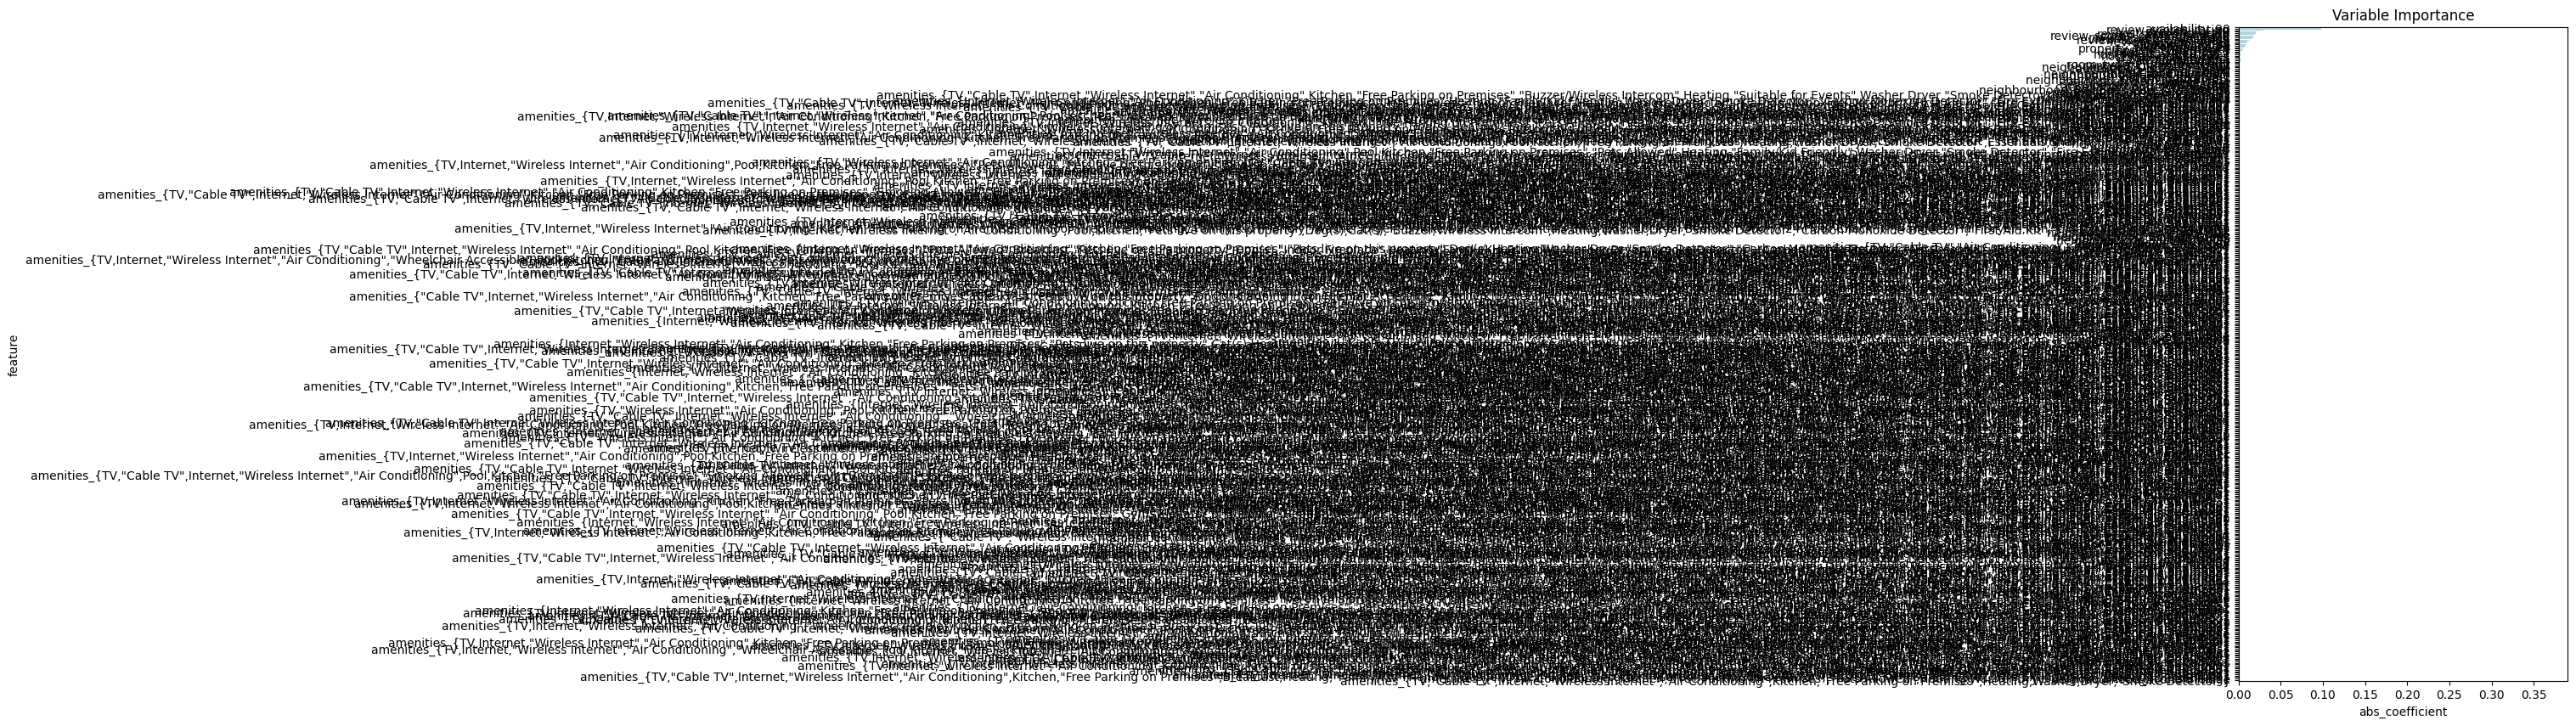

-- rejected --
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Washer / Dryer","Pets live on this property",Cat(s),Heating,"Family/Kid Friendly",Washer,Dryer}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Gym,Breakfast,"Pets live on this property","Family/Kid Friendly"}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Heating,"Family/Kid Friendly","Suitable for Events",Washer,Dryer,"Smoke Detector","First Aid Kit","Fire Extinguisher",Essentials,Shampoo}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Cat(s),Heating,"Suitable for Events",Washer,Dryer}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Breakfast,Heating}
 amenities_{TV,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises",Gym,Breakfast,"Pets live on this property

In [ ]:
# plot variable importance
def plot_variable_imp(df_coef):
  df_plt = df_coef[df_coef['abs_coefficient'] != 0]
  reject_vars = df_coef[df_coef['abs_coefficient'] == 0]['feature'].tolist()

  plt.figure(figsize=(5, 10))
  plt.title('Variable Importance')
  plt.xlabel('Coefficient')
  plt.ylabel('Feature')
  sns.barplot(data=df_plt,
                     y=df_plt['feature'],
                     x=df_plt['abs_coefficient'], color="lightblue")

  plt.show()
  print("-- rejected --")
  for i in reject_vars:
    print(f" {i}")

plot_variable_imp(df_coefficients1)
plot_variable_imp(df_coefficients01)
plot_variable_imp(df_coefficients2)
#plot_variable_imp(df_coefficients12)

In [ ]:
# make predictions on the testing data
y_pred_train = lr_l1_1.predict(X_train)
y_pred_test = lr_l1_1.predict(X_test)
y_proba_train = lr_l1_1.predict_proba(X_train)
y_proba_test = lr_l1_1.predict_proba(X_test)

y_pred_train1 = lr_l1_01.predict(X_train)
y_pred_test1 = lr_l1_01.predict(X_test)
y_proba_train1 = lr_l1_01.predict_proba(X_train)
y_proba_test1 = lr_l1_01.predict_proba(X_test)

#y_pred_train2 = lr_l2.predict(X_train)
#y_pred_test2 = lr_l2.predict(X_test)
#y_proba_train2 = lr_l2.predict_proba(X_train)
#y_proba_test2 = lr_l2.predict_proba(X_test)

L1 with c=0.1

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y_train, y_pred_train)
prec3_train = precision_score(y_train, y_pred_train)
rec3_train = recall_score(y_train, y_pred_train)
auc3_train = roc_auc_score(y_train, y_proba_train[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("AUC      : {:.4f}".format(auc3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y_test, y_pred_test)
prec3_test = precision_score(y_test, y_pred_test)
rec3_test = recall_score(y_test, y_pred_test)
auc3_test = roc_auc_score(y_test, y_proba_test[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))
print("AUC      : {:.4f}".format(auc3_test))

 -- train set -- 
Accuracy : 0.9955
Precision: 0.9903
Recall.  : 0.9951
AUC      : 0.9999

 -- test set -- 
Accuracy : 0.9957
Precision: 0.9972
Recall.  : 0.9888
AUC      : 0.9999


L1 with 0.01

In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train1 = accuracy_score(y_train, y_pred_train1)
prec3_train1 = precision_score(y_train, y_pred_train1)
rec3_train1 = recall_score(y_train, y_pred_train1)
auc3_train1 = roc_auc_score(y_train, y_proba_train1[:,1])

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train1))
print("Precision: {:.4f}".format(prec3_train1))
print("Recall.  : {:.4f}".format(rec3_train1))
print("AUC      : {:.4f}".format(auc3_train1))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test1 = accuracy_score(y_test, y_pred_test1)
prec3_test1 = precision_score(y_test, y_pred_test1)
rec3_test1 = recall_score(y_test, y_pred_test1)
auc3_test1 = roc_auc_score(y_test, y_proba_test1[:,1])

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test1))
print("Precision: {:.4f}".format(prec3_test1))
print("Recall.  : {:.4f}".format(rec3_test1))
print("AUC      : {:.4f}".format(auc3_test1))

 -- train set -- 
Accuracy : 0.9925
Precision: 0.9855
Recall.  : 0.9903
AUC      : 0.9998

 -- test set -- 
Accuracy : 0.9949
Precision: 0.9944
Recall.  : 0.9888
AUC      : 0.9999


#Linear Regression (Question 3)

In [ ]:
numeric_columns = clean_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns

Index(['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'booked'],
      dtype='object')

In [ ]:
new_numbers_columns = ['host_response_rate', 'host_listings_count', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'square_feet', 'price', 'cleaning_fee',
       'guests_included', 'minimum_nights', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'booked']

In [ ]:
# Fit full regression
X = clean_data[new_numbers_columns].drop(columns=['booked'])
y = clean_data['booked']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X.astype(float)).fit()

# Display regression summary
print(fullreg.summary())


                            OLS Regression Results                            
Dep. Variable:                 booked   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1666.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:35:08   Log-Likelihood:                 2145.9
No. Observations:                5835   AIC:                            -4244.
Df Residuals:                    5811   BIC:                            -4084.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


                       Variable         VIF
0                         const  764.989195
1            host_response_rate    1.027425
2           host_listings_count    1.168272
3                  accommodates    4.146496
4                     bathrooms    2.802798
5                      bedrooms    4.216866
6                          beds    3.667059
7                   square_feet    1.046842
8                         price    1.727771
9                  cleaning_fee    1.784888
10              guests_included    1.341669
11               minimum_nights    1.008529
12              availability_30   14.048183
13              availability_60   48.282387
14              availability_90   27.175308
15             availability_365    2.126321
16            number_of_reviews    1.093298
17         review_scores_rating    2.868277
18       review_scores_accuracy    1.955396
19    review_scores_cleanliness    2.036020
20        review_scores_checkin    1.857260
21  review_scores_communication 

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [ ]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  availability_365 with p-value 0.0000
Add  availability_60 with p-value 0.0000


<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  availability_90 with p-value 0.0000
Add  const with p-value 0.0000


<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  availability_30 with p-value 0.0000
Drop availability_60 with p-value 0.2289
Add  number_of_reviews with p-value 0.0000

<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  host_listings_count with p-value 0.0000


<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  beds with p-value 0.0043


<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  price with p-value 0.0000


<ipython-input-393-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['availability_365', 'availability_90', 'const', 'availability_30', 'number_of_reviews', 'host_listings_count', 'beds', 'price']


In [ ]:
# Fit stepwise regression
X = clean_data[['availability_90', 'availability_30', 'number_of_reviews', 'host_listings_count', 'availability_365', 'beds', 'price']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                            OLS Regression Results                            
Dep. Variable:                 booked   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     5480.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:35:18   Log-Likelihood:                 2141.2
No. Observations:                5835   AIC:                            -4266.
Df Residuals:                    5827   BIC:                            -4213.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0095    

In [ ]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


              Variable       VIF
0                const  7.701417
1      availability_90  7.968879
2      availability_30  6.398888
3    number_of_reviews  1.050609
4  host_listings_count  1.027393
5     availability_365  2.086171
6                 beds  1.292179
7                price  1.301696


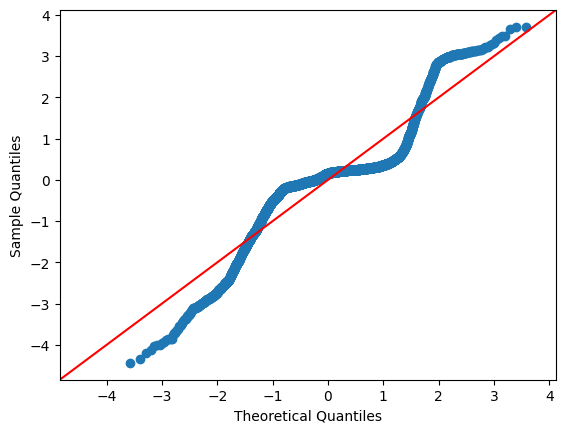

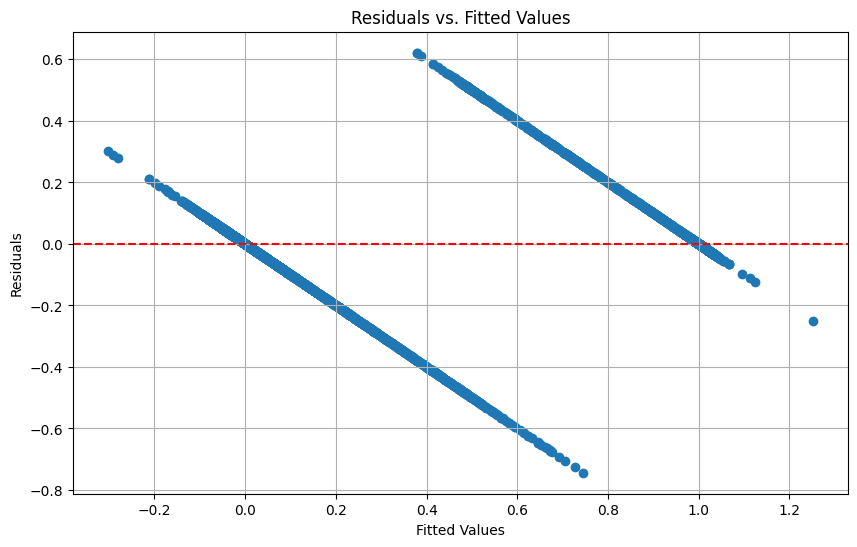

In [ ]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
# Square Root transformed regression
X = clean_data[['availability_90','availability_30', 'number_of_reviews', 'host_listings_count', 'beds', 'price']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                            OLS Regression Results                            
Dep. Variable:                 booked   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     6382.
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:35:33   Log-Likelihood:                 2136.1
No. Observations:                5835   AIC:                            -4258.
Df Residuals:                    5828   BIC:                            -4212.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0198    

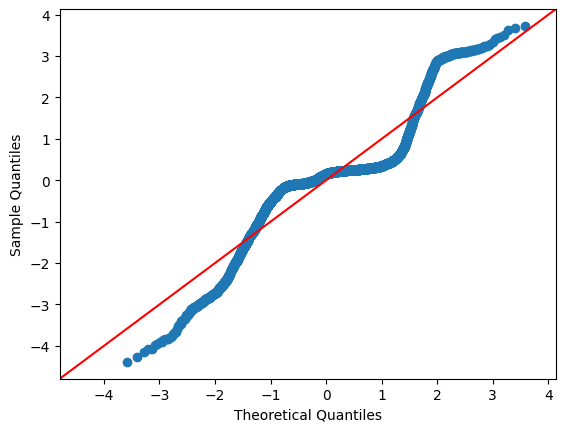

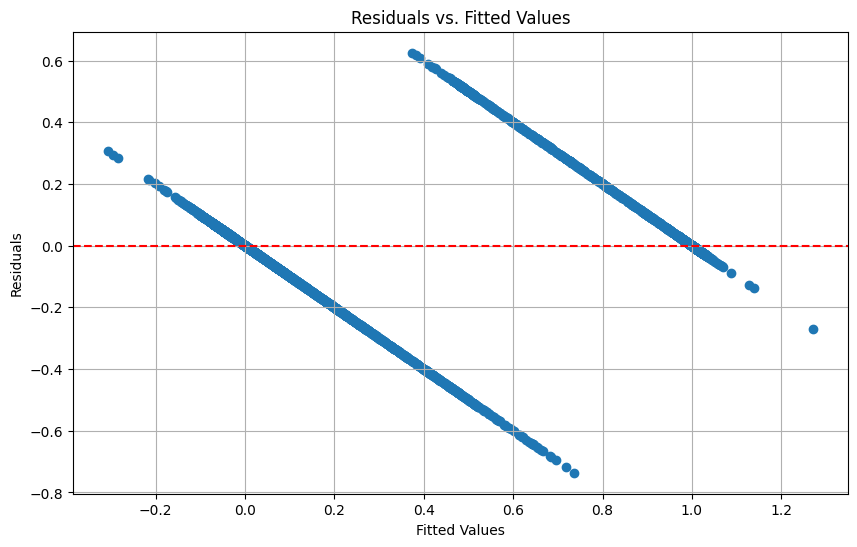

In [ ]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
clean_data.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'booked'],
      dtype='object')

In [ ]:
# sqrt transformed regression including categorical variables
X = clean_data[['availability_90', 'availability_30', 'number_of_reviews', 'host_listings_count', 'beds', 'price','instant_bookable', 'room_type','neighbourhood']]
X = pd.get_dummies(X, columns=['instant_bookable', 'room_type','neighbourhood'], drop_first=True)
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg2.summary())

                            OLS Regression Results                            
Dep. Variable:                 booked   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     440.8
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:36:10   Log-Likelihood:                 2205.0
No. Observations:                5835   AIC:                            -4232.
Df Residuals:                    5746   BIC:                            -3638.
Df Model:                          88                                         
Covariance Type:            nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------

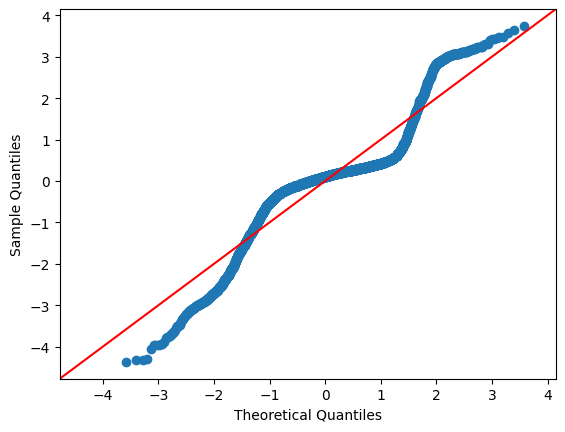

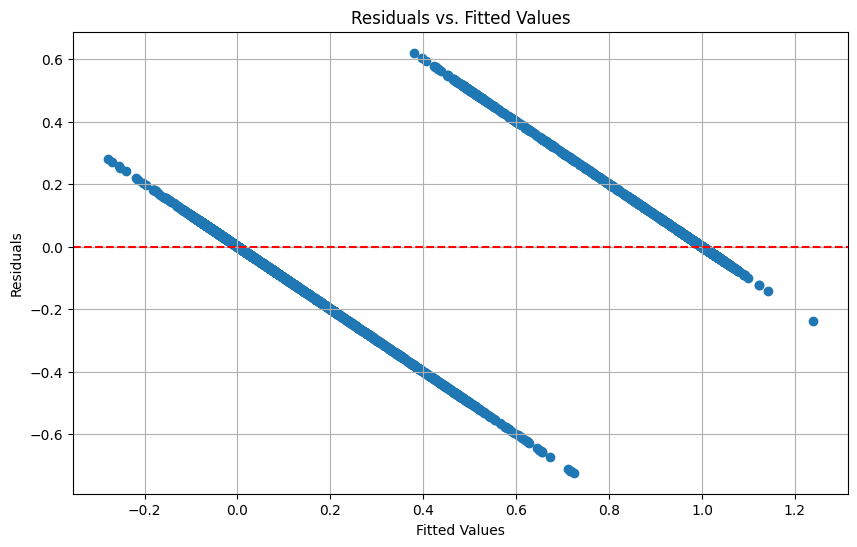

In [ ]:
# Calculate residuals
residuals = sqrtreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

##Part 2

In [ ]:
# Fit full regression
X = clean_data[new_numbers_columns].drop(columns=['review_scores_value'])
y = clean_data['review_scores_value']
X = sm.add_constant(X)
fullreg = sm.OLS(y, X.astype(float)).fit()

# Display regression summary
print(fullreg.summary())


                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.513
Model:                             OLS   Adj. R-squared:                  0.511
Method:                  Least Squares   F-statistic:                     265.6
Date:                 Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                         03:41:26   Log-Likelihood:                -4254.0
No. Observations:                 5835   AIC:                             8556.
Df Residuals:                     5811   BIC:                             8716.
Df Model:                           23                                         
Covariance Type:             nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const   

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
vifres = pd.DataFrame()
vifres["Variable"] = X.columns
vifres["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifres)


                       Variable         VIF
0                         const  801.859912
1            host_response_rate    1.025764
2           host_listings_count    1.171597
3                  accommodates    4.145283
4                     bathrooms    2.802852
5                      bedrooms    4.213863
6                          beds    3.674953
7                   square_feet    1.046950
8                         price    1.726977
9                  cleaning_fee    1.782782
10              guests_included    1.342086
11               minimum_nights    1.008275
12              availability_30   14.685569
13              availability_60   48.253195
14              availability_90   37.357970
15             availability_365    2.127855
16            number_of_reviews    1.123913
17         review_scores_rating    2.596130
18       review_scores_accuracy    1.907387
19    review_scores_cleanliness    2.016335
20        review_scores_checkin    1.844723
21  review_scores_communication 

In [ ]:
def stepwise_selection(X, y,
                       initial_list=[],
                       threshold_in=0.01,
                       threshold_out = 0.05,
                       verbose=True):
    """ Perform a forward-backward feature selection
    based on p-value from statsmodels.api.OLS

    Arguments:
        X - pandas.DataFrame of numeric features
        y - vector, series of the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions

    Returns: list of selected features

    Example Call: stepwise_selection(X, y)
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print(f'Add  {best_feature} with p-value {best_pval:.4f}')
        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print(f'Drop {worst_feature} with p-value {worst_pval:.4f}')
        if not changed:
           break
    return included


In [ ]:
selected_features  = stepwise_selection(X, y)
print('resulting features:')
print(selected_features)

<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  review_scores_accuracy with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  review_scores_rating with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  review_scores_location with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  review_scores_checkin with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  review_scores_cleanliness with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  price with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  const with p-value 0.0000


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  number_of_reviews with p-value 0.0012


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  host_response_rate with p-value 0.0038


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


Add  cleaning_fee with p-value 0.0086


<ipython-input-359-e30aa04bf407>:26: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)


resulting features:
['review_scores_accuracy', 'review_scores_rating', 'review_scores_location', 'review_scores_checkin', 'review_scores_cleanliness', 'price', 'const', 'number_of_reviews', 'host_response_rate', 'cleaning_fee']


In [ ]:
# Fit stepwise regression
X = clean_data[['review_scores_accuracy', 'review_scores_rating', 'review_scores_location', 'review_scores_checkin', 'review_scores_cleanliness', 'price', 'number_of_reviews', 'host_response_rate', 'cleaning_fee']]
X = sm.add_constant(X)
stepreg = sm.OLS(y, X).fit()

# Display regression summary
print(stepreg.summary())


                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.510
Model:                             OLS   Adj. R-squared:                  0.509
Method:                  Least Squares   F-statistic:                     673.3
Date:                 Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                         02:50:09   Log-Likelihood:                -4269.6
No. Observations:                 5835   AIC:                             8559.
Df Residuals:                     5825   BIC:                             8626.
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

In [ ]:
vifresstep = pd.DataFrame()
vifresstep["Variable"] = X.columns
vifresstep["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vifresstep)


                    Variable         VIF
0                      const  637.674669
1     review_scores_accuracy    1.884168
2       review_scores_rating    2.451351
3     review_scores_location    1.234519
4      review_scores_checkin    1.457589
5  review_scores_cleanliness    2.006082
6                      price    1.335520
7          number_of_reviews    1.041253
8         host_response_rate    1.012260
9               cleaning_fee    1.336919


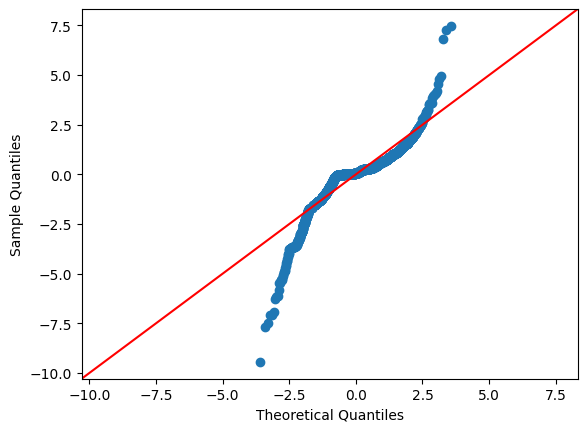

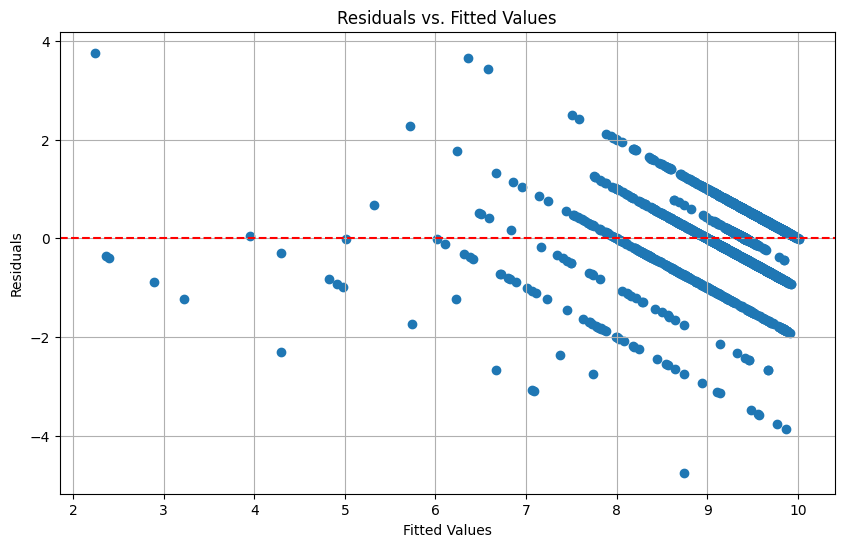

In [ ]:
# Calculate residuals
residuals = stepreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals,fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(stepreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
# Square Root transformed regression
X = clean_data[['review_scores_accuracy', 'review_scores_rating', 'review_scores_location', 'review_scores_checkin', 'review_scores_cleanliness', 'price', 'number_of_reviews', 'host_response_rate', 'cleaning_fee']]
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg.summary())

                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.532
Model:                             OLS   Adj. R-squared:                  0.532
Method:                  Least Squares   F-statistic:                     736.5
Date:                 Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                         02:50:10   Log-Likelihood:                 5920.7
No. Observations:                 5835   AIC:                        -1.182e+04
Df Residuals:                     5825   BIC:                        -1.175e+04
Df Model:                            9                                         
Covariance Type:             nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const       

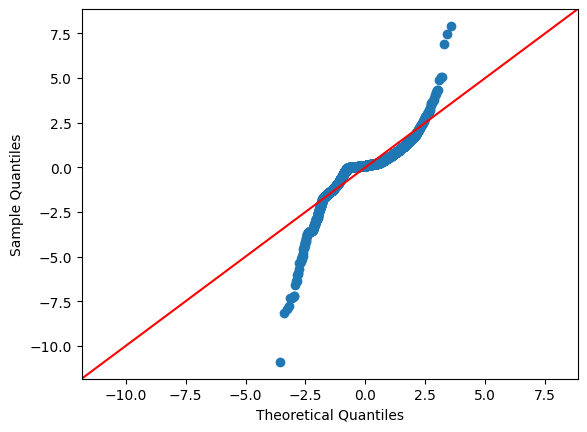

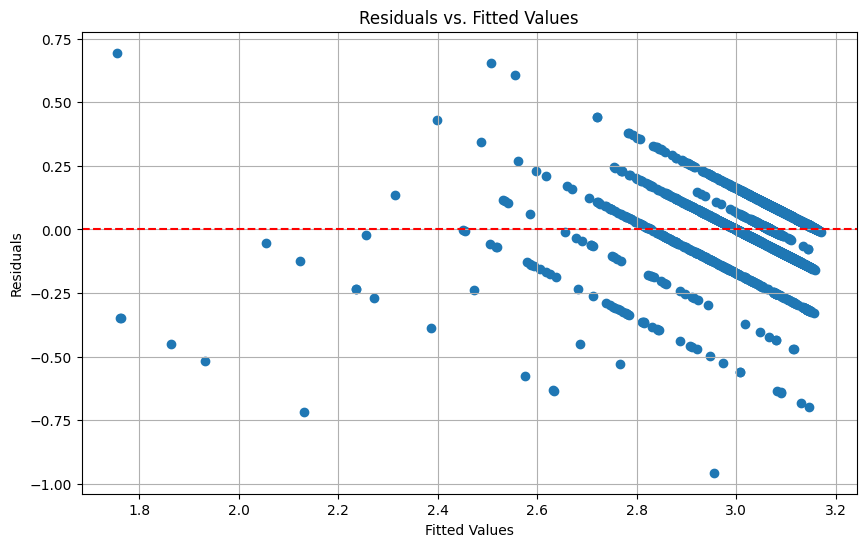

In [ ]:
# Calculate residuals
residuals = sqrtreg.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

In [ ]:
clean_data.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'booked'],
      dtype='object')

In [ ]:
# sqrt transformed regression including categorical variables
X = clean_data[['review_scores_accuracy', 'review_scores_rating', 'review_scores_location', 'review_scores_checkin', 'review_scores_cleanliness', 'number_of_reviews', 'host_response_rate', 'cleaning_fee','instant_bookable', 'room_type','neighbourhood']]
X = pd.get_dummies(X, columns=['instant_bookable', 'room_type','neighbourhood'], drop_first=True)
X = sm.add_constant(X)
sqrty = np.sqrt(y)
sqrtreg2 = sm.OLS(sqrty, X).fit()

# Display regression summary
print(sqrtreg2.summary())

                             OLS Regression Results                            
Dep. Variable:     review_scores_value   R-squared:                       0.548
Model:                             OLS   Adj. R-squared:                  0.541
Method:                  Least Squares   F-statistic:                     77.47
Date:                 Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                         02:50:10   Log-Likelihood:                 6022.4
No. Observations:                 5835   AIC:                        -1.186e+04
Df Residuals:                     5744   BIC:                        -1.126e+04
Df Model:                           90                                         
Covariance Type:             nonrobust                                         
                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------

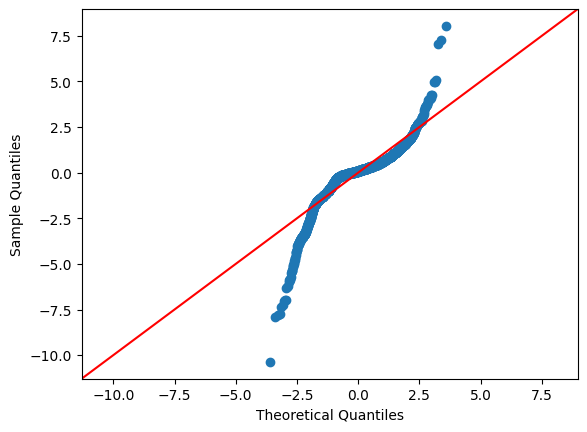

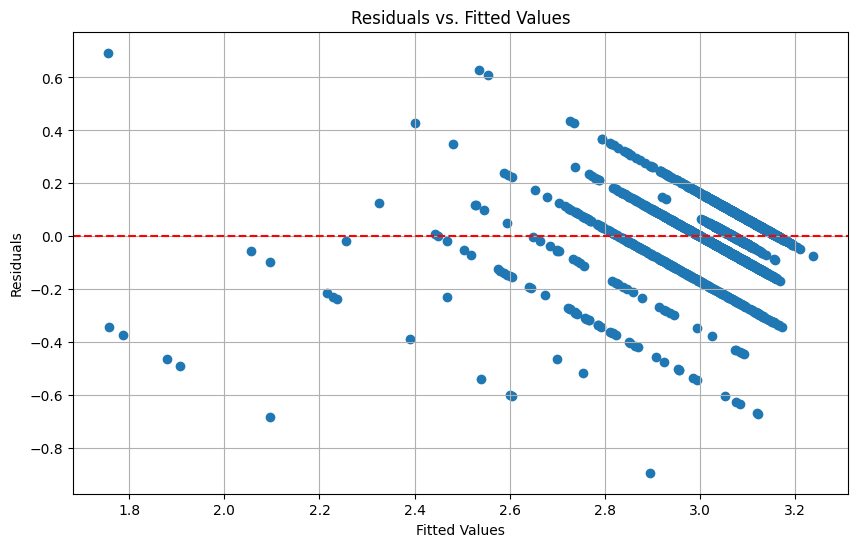

In [ ]:
# Calculate residuals
residuals = sqrtreg2.resid

# Generate Q-Q Plot
fig = sm.qqplot(residuals, fit=True, line='45')
plt.show()


# Residuals vs. Fitted
plt.figure(figsize=(10, 6))
plt.scatter(sqrtreg2.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0
plt.grid(True)
plt.show()

#Classification Tree (Question 4)

In [ ]:
clean_data.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'booked'],
      dtype='object')

In [ ]:
# split the data into training and testing sets
X3 = clean_data.drop(['booked'], axis=1)
X3=clean_data[['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', ]]

X3 = pd.get_dummies(X3, columns=['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', ], drop_first=False)

y3 = clean_data['booked']
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=42)

X3_train.info()

y3_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4084 entries, 2313 to 860
Columns: 6268 entries, host_response_rate_10.0 to cancellation_policy_super_strict_30
dtypes: uint8(6268)
memory usage: 24.4 MB
<class 'pandas.core.series.Series'>
Int64Index: 4084 entries, 2313 to 860
Series name: booked
Non-Null Count  Dtype
--------------  -----
4084 non-null   int64
dtypes: int64(1)
memory usage: 63.8 KB


In [ ]:
# create an instance of a decision tree classifier

dt = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=10, ccp_alpha = 0)

# fit the model to the training data
dt.fit(X3_train, y3_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=5, min_samples_leaf=10)

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
# visualize the decision tree
dot_data = export_graphviz(dt, filled=True, rounded=True, feature_names=X3.columns, class_names=['0', '1'])
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

'decision_tree.pdf'

In [ ]:
# make predictions on the training and test data
y_pred_train3 = dt.predict(X3_train)
y_pred_test3 = dt.predict(X3_test)

y_prob_train3 = dt.predict_proba(X3_train)
y_prob_test3 = dt.predict_proba(X3_test)


In [ ]:
# calculate the accuracy, precision, and recall scores
acc3_train = accuracy_score(y3_train, y_pred_train3)
prec3_train = precision_score(y3_train, y_pred_train3)
rec3_train = recall_score(y3_train, y_pred_train3)

# print the scores
print(" -- train set -- ")
print("Accuracy : {:.4f}".format(acc3_train))
print("Precision: {:.4f}".format(prec3_train))
print("Recall.  : {:.4f}".format(rec3_train))
print("")

# calculate the accuracy, precision, and recall scores
acc3_test = accuracy_score(y3_test, y_pred_test3)
prec3_test = precision_score(y3_test, y_pred_test3)
rec3_test = recall_score(y3_test, y_pred_test3)

print(" -- test set -- ")
print("Accuracy : {:.4f}".format(acc3_test))
print("Precision: {:.4f}".format(prec3_test))
print("Recall.  : {:.4f}".format(rec3_test))

 -- train set -- 
Accuracy : 0.9302
Precision: 0.9589
Recall.  : 0.8056

 -- test set -- 
Accuracy : 0.9143
Precision: 0.9568
Recall.  : 0.7627


In [ ]:
# Generate ROC curve for training data

#fpr, tpr, thresholds = roc_curve(y3_train.cat.codes, y_prob_train3[:,1])
#roc_auc = roc_auc_score(y3_train.cat.codes, y_prob_train3[:,1])

# Plot ROC curve
#plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic for Training Data')
#plt.legend(loc='lower right')
#plt.show()

In [ ]:
# Generate ROC curve for test data
#fpr, tpr, thresholds = roc_curve(y3_test.cat.codes, y_prob_test3[:,1])
#roc_auc = roc_auc_score(y3_test.cat.codes, y_prob_test3[:,1])

# Plot ROC curve
#plt.figure()
#plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.4f})')
#plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.05])
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
#plt.title('Receiver Operating Characteristic for Test Data')
#plt.legend(loc='lower right')
#plt.show()

      importance                                            feature
5459    0.877257                                  availability_30_0
5495    0.030608                                  availability_60_5
5490    0.021947                                  availability_60_0
5560    0.020181                                  availability_90_9
5504    0.019239                                 availability_60_14
...          ...                                                ...
2087    0.000000  amenities_{TV,"Cable TV",Internet,"Wireless In...
2086    0.000000  amenities_{TV,"Cable TV",Internet,"Wireless In...
2085    0.000000  amenities_{TV,"Cable TV",Internet,"Wireless In...
2084    0.000000  amenities_{TV,"Cable TV",Internet,"Wireless In...
6267    0.000000                cancellation_policy_super_strict_30

[6268 rows x 2 columns]


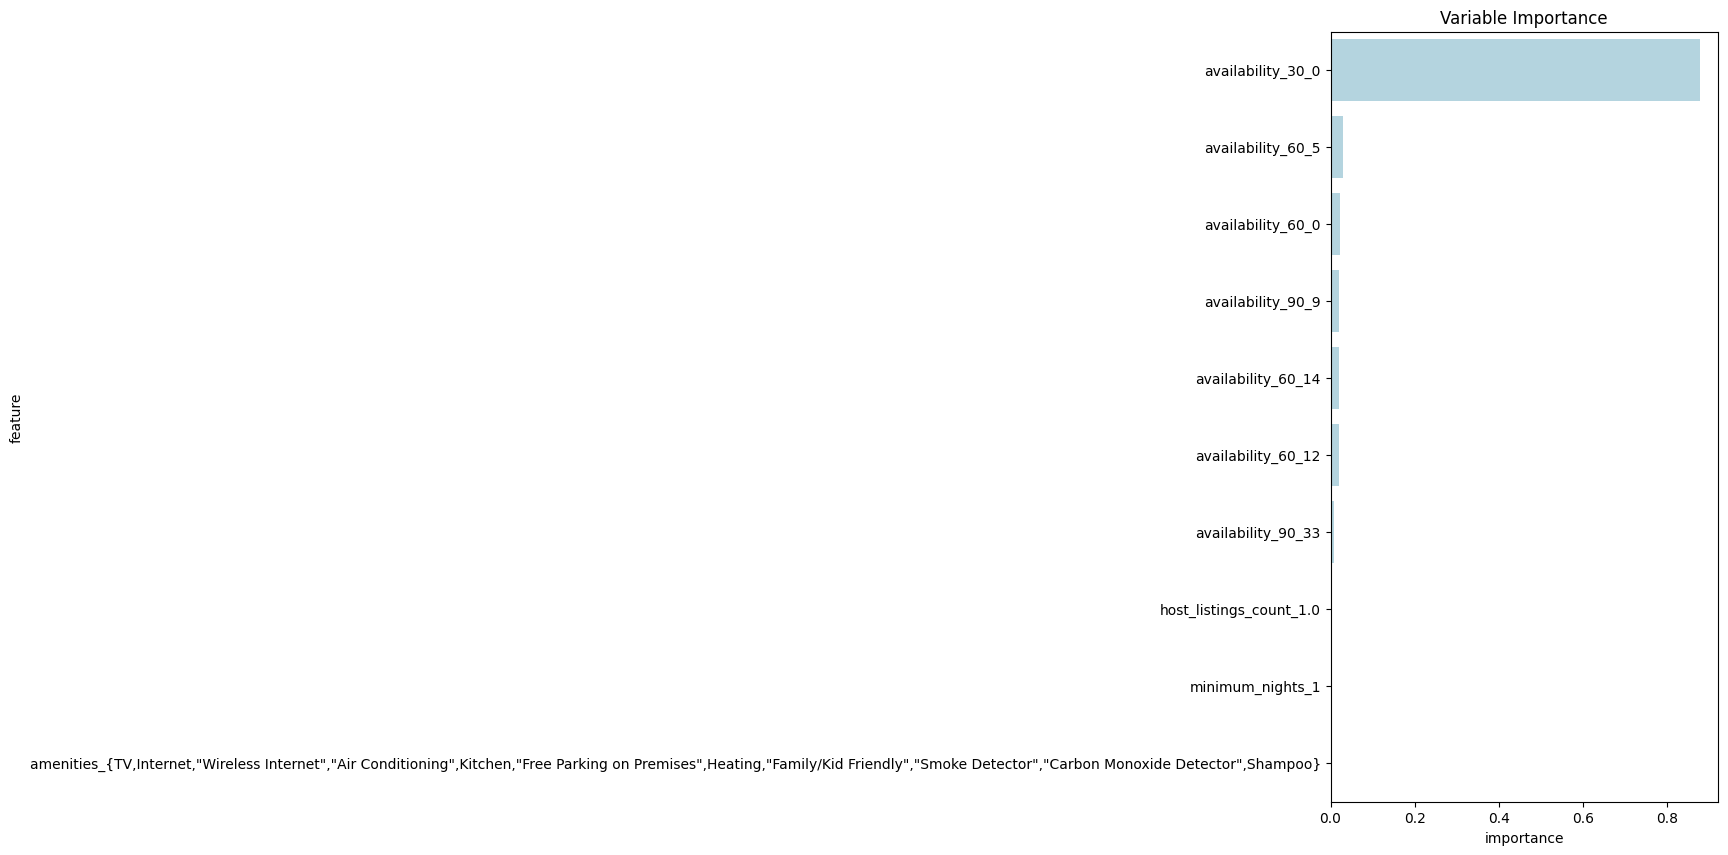

In [ ]:
#calculate feature importance
tree_imp = dt.feature_importances_

#create a data frame with feature names

# creating a list of column names
column_values = ['importance']

# creating the dataframe
df = pd.DataFrame(data = tree_imp,
                  columns = column_values)
df['feature']=X3.columns

#sort data so features with largest importance values are at the top
df2 = df.sort_values(by=['importance'], ascending=False)

print(df2)

#Create variable importance plot
plt.figure(figsize=(5, 10))
plt.title('Variable Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
sns.barplot(data=df2.head(10),
            y=df2.head(10)['feature'],
            x=df2['importance'], color="lightblue")

plt.show()

#K Means Test

In [ ]:
clean_data.columns

Index(['host_response_rate', 'host_is_superhost', 'host_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price',
       'cleaning_fee', 'guests_included', 'minimum_nights', 'has_availability',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'booked'],
      dtype='object')

In [ ]:
clust_columns = ['bathrooms',
       'bedrooms', 'beds','square_feet', 'price',
       'availability_30', 'availability_60', 'availability_90',
       'availability_365','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'booked']

In [ ]:
df_clust = clean_data[clust_columns]
df_clust

bathrooms  bedrooms  beds  square_feet    price  availability_30  \
0           2.5       1.0   3.0  3600.000000  30000.0                0   
1           0.0       1.0   1.0  1309.596026   9900.0               29   
2           1.5       1.0   1.0  1309.596026  10000.0               30   
3           1.5       1.0   1.0  1309.596026  10000.0               30   
4           2.0       3.0   3.0  1309.596026  59900.0               27   
...         ...       ...   ...          ...      ...              ...   
5830        1.0       1.0   2.0  1309.596026  17900.0               15   
5831        1.0       1.0   2.0  1309.596026   8500.0               11   
5832        1.0       0.0   1.0  1309.596026   6600.0               29   
5833        1.0       1.0   1.0  1309.596026   2500.0               30   
5834        1.0       1.0   1.0  1309.596026  12000.0                2   

      availability_60  availability_90  availability_365  \
0                   0                0               240   
1                  59               89               364   
2                  60               90               365   
3                  60               90               365   
4                  57               87               358   
...               ...              ...               ...   
5830               45               65               340   
5831               36               62               316   
5832               59               89               364   
5833               60               90               365   
5834                2                2                77   

      review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0               100.000000               10.000000                  10.000000   
1                95.435735                9.645657                   9.515881   
2                95.435735                9.645657                   9.515881   
3                95.435735                9.645657                   9.515881   
4                95.435735                9.645657                   9.515881   
...                    ...                     ...                        ...   
5830            100.000000               10.000000                  10.000000   
5831             95.435735                9.645657                   9.515881   
5832            100.000000                8.000000                  10.000000   
5833             95.435735                9.645657                   9.515881   
5834             95.435735                9.645657                   9.515881   

      review_scores_checkin  review_scores_communication  \
0                 10.000000                    10.000000   
1                  9.830863                     9.839068   
2                  9.830863                     9.839068   
3                  9.830863                     9.839068   
4                  9.830863                     9.839068   
...                     ...                          ...   
5830              10.000000                    10.000000   
5831               9.830863                     9.839068   
5832              10.000000                    10.000000   
5833               9.830863                     9.839068   
5834               9.830863                     9.839068   

      review_scores_location  review_scores_value  booked  
0                  10.000000            10.000000       1  
1                   9.468378             9.416093       0  
2                   9.468378             9.416093       0  
3                   9.468378             9.416093       0  
4                   9.468378             9.416093       0  
...                      ...                  ...     ...  
5830               10.000000             9.000000       0  
5831                9.468378             9.416093       0  
5832               10.000000             8.000000       0  
5833                9.468378             9.416093       0  
5834                9.468378             9

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sample_data
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
#Standardize Data
dfcolumns = df_clust.columns.values.tolist()

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_clust.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=dfcolumns)


df_scaled.head()

bathrooms  bedrooms      beds   square_feet     price  availability_30  \
0   1.322591 -0.650238  0.478072  1.123960e+01  0.034271        -1.341017   
1  -1.917835 -0.650238 -0.735800  1.115781e-15 -0.464245         1.012609   
2   0.026420 -0.650238 -0.735800  1.115781e-15 -0.461764         1.093769   
3   0.026420 -0.650238 -0.735800  1.115781e-15 -0.461764         1.093769   
4   0.674506  1.110206  0.478072  1.115781e-15  0.775843         0.850290   

   availability_60  availability_90  availability_365  review_scores_rating  \
0        -1.495466        -1.595780         -0.248596          7.802332e-01   
1         0.962058         0.908488          0.787964         -2.429259e-15   
2         1.003711         0.936626          0.796323         -2.429259e-15   
3         1.003711         0.936626          0.796323         -2.429259e-15   
4         0.878752         0.852213          0.737807         -2.429259e-15   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0            5.813344e-01                   0.648127           3.795180e-01   
1            2.914286e-15                   0.000000          -3.985875e-15   
2            2.914286e-15                   0.000000          -3.985875e-15   
3            2.914286e-15                   0.000000          -3.985875e-15   
4            2.914286e-15                   0.000000          -3.985875e-15   

   review_scores_communication  review_scores_location  review_scores_value  \
0                     0.354849                0.792613             0.812725   
1                     0.000000                0.000000             0.000000   
2                     0.000000                0.000000             0.000000   
3                     0.000000                0.000000             0.000000   
4                     0.000000                0.000000             0.000000   

     booked  
0  1.499026  
1 -0.667100  
2 -0.667100  
3 -0.667100  
4 -0.667100

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

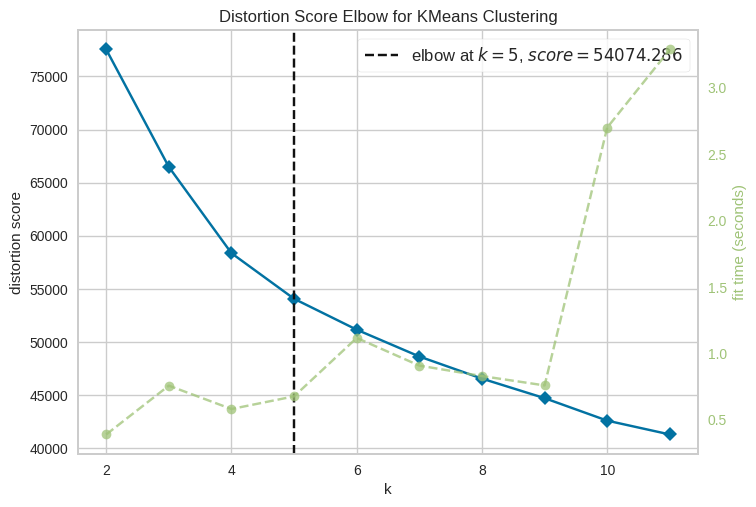

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# set the model type to k-means
model = KMeans()

# generate an elbow plot for k = 2 to 12 clusters using the scaled data
visualizer = KElbowVisualizer(model, k=(2, 12))
visualizer.fit(df_scaled)
visualizer.show()

For n_clusters = 2 The average silhouette_score is : 0.3004661017975845
For n_clusters = 3 The average silhouette_score is : 0.31464853409137894
For n_clusters = 4 The average silhouette_score is : 0.2925776508515807
For n_clusters = 5 The average silhouette_score is : 0.2947294280818976
For n_clusters = 6 The average silhouette_score is : 0.18412279830001296


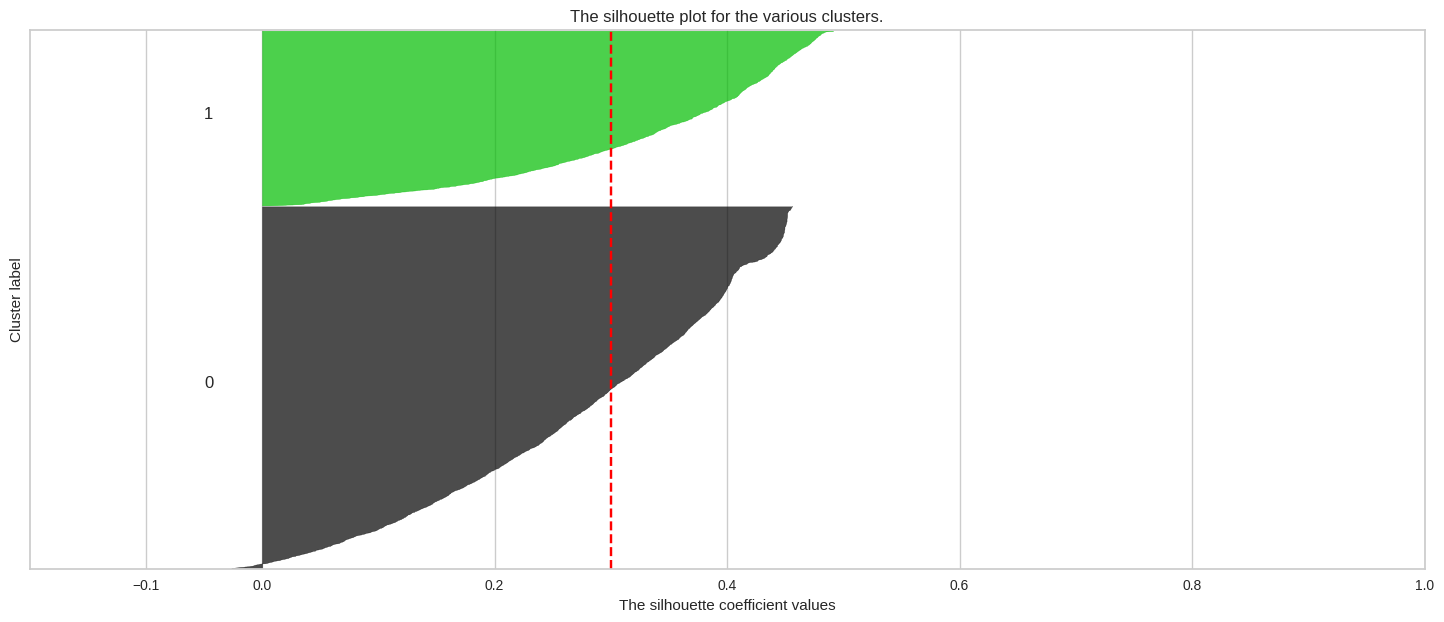

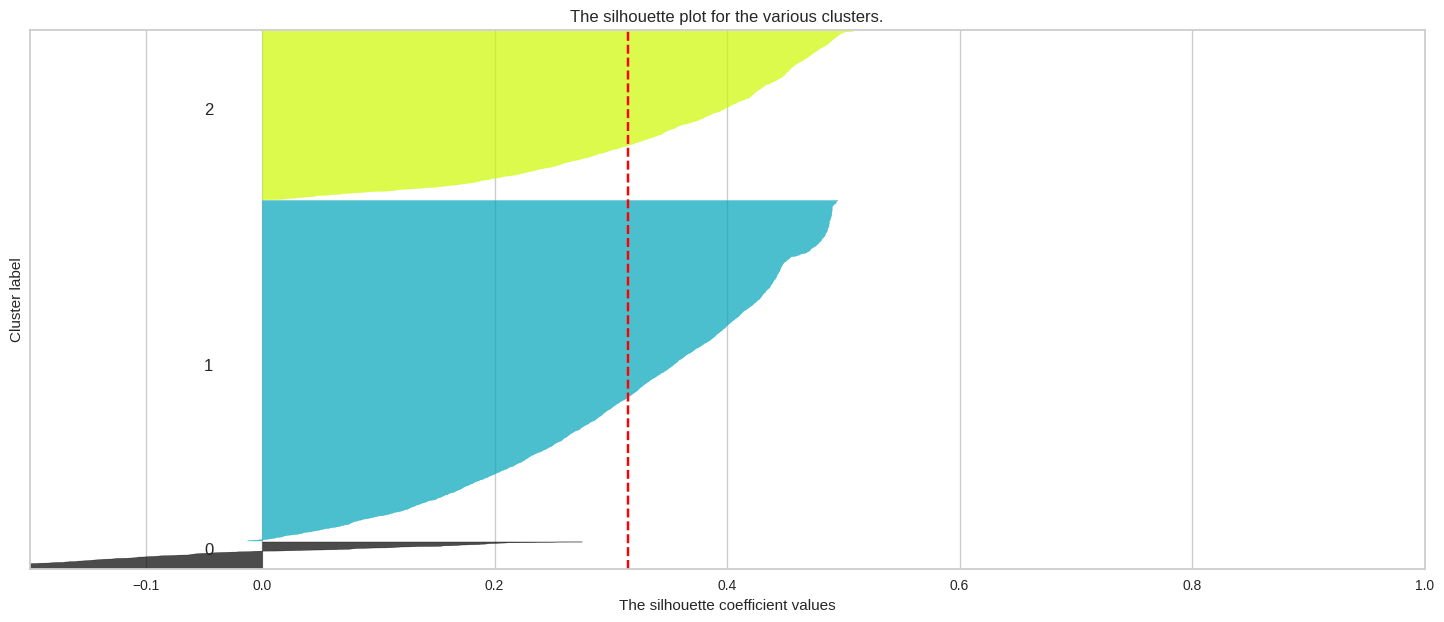

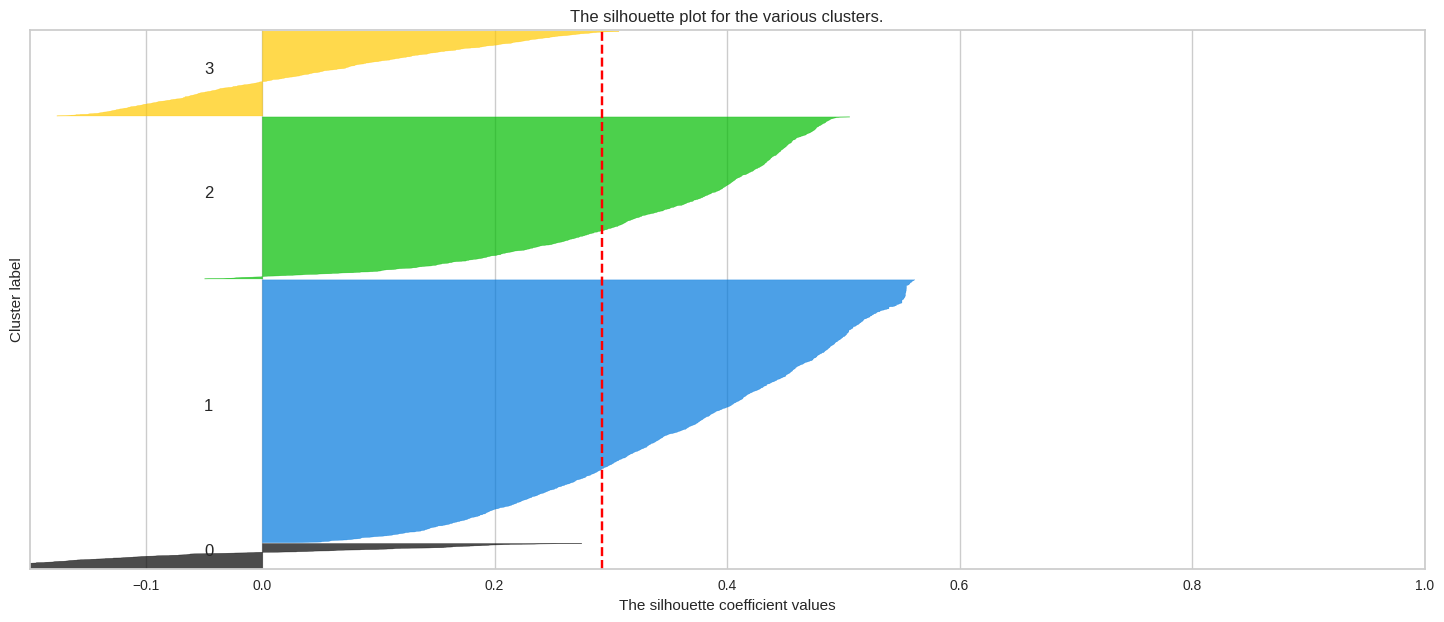

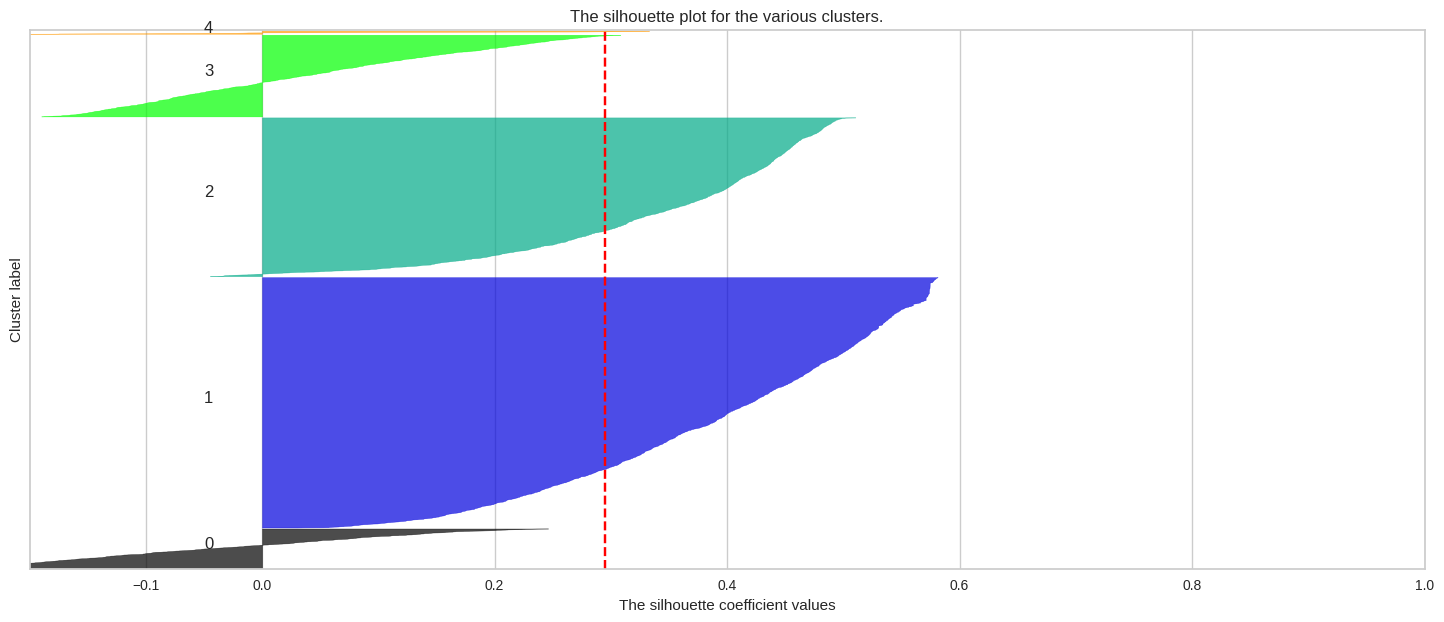

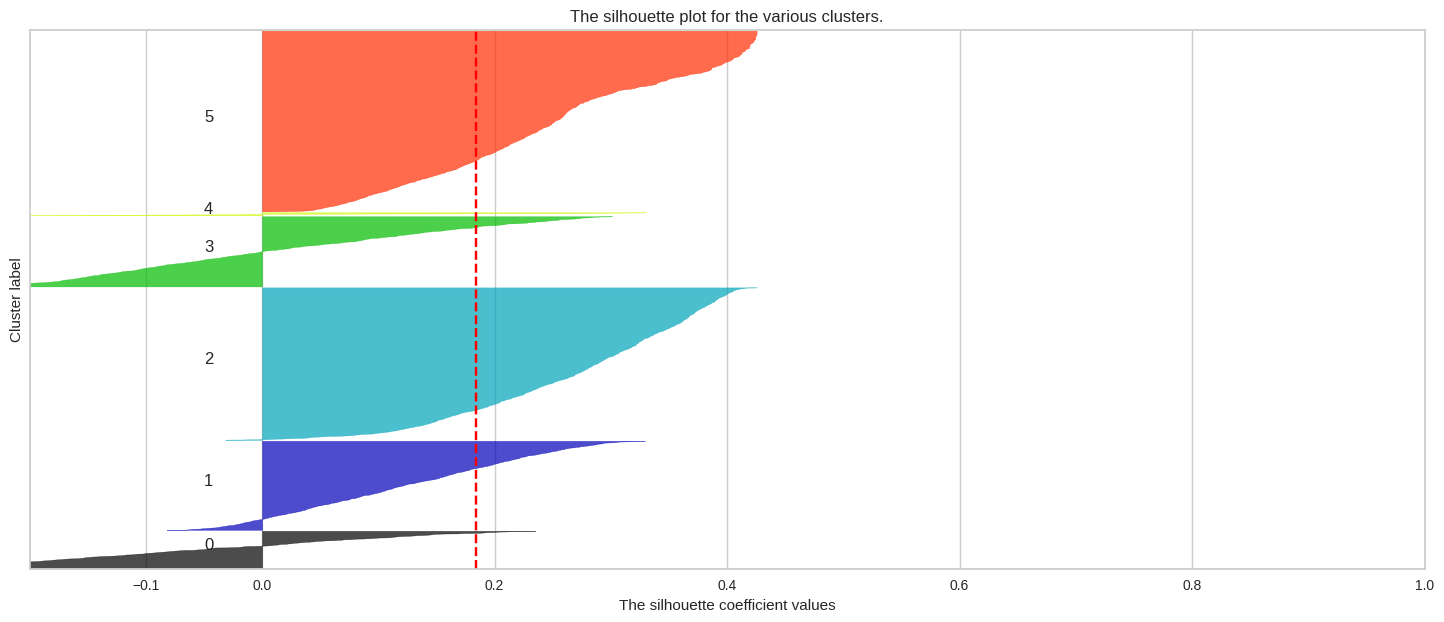

In [ ]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X=df_scaled
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    ax1.set_xlim([-0.2, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
# Create an instance of KMeans with the desired value of k and fit to the scaled data
kmeans = KMeans(n_clusters=5, random_state=904)
kmclus=kmeans.fit(df_scaled)

clusters = kmeans.fit_predict(df_scaled)

#append cluster to original data
df_clust['cluster']=clusters

df_clust.info()

# Evaluate cluster sizes to insure that they are similar
print(df_clust['cluster'].value_counts())

# Examine the means of each variable by cluster
df_desc = df_clust.groupby('cluster').mean()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
     print(df_desc)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5835 entries, 0 to 5834
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   bathrooms                    5835 non-null   float64
 1   bedrooms                     5835 non-null   float64
 2   beds                         5835 non-null   float64
 3   square_feet                  5835 non-null   float64
 4   price                        5835 non-null   float64
 5   availability_30              5835 non-null   int64  
 6   availability_60              5835 non-null   int64  
 7   availability_90              5835 non-null   int64  
 8   availability_365             5835 non-null   int64  
 9   review_scores_rating         5835 non-null   float64
 10  review_scores_accuracy       5835 non-null   float64
 11  review_scores_cleanliness    5835 non-null   float64
 12  review_scores_checkin        5835 non-null   float64
 13  review_scores_comm

<ipython-input-413-b42553afc58e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clust['cluster']=clusters


##Profiles

Nightly Rates


<Figure size 800x400 with 0 Axes>

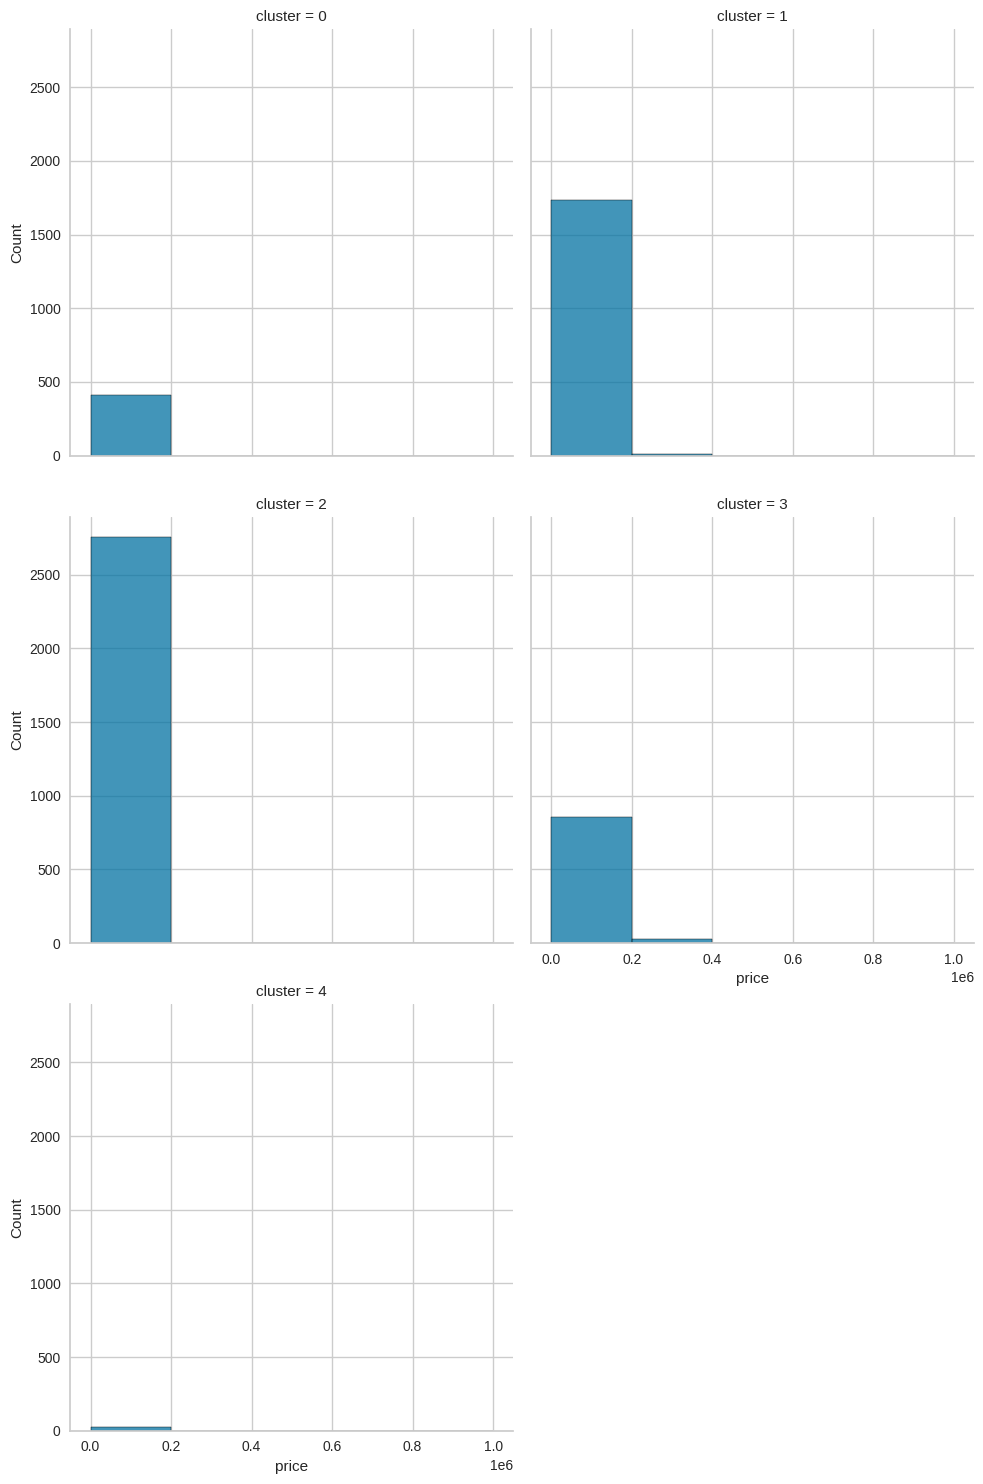

In [ ]:
#Nightly Rates
plt.figure(figsize=(8,4))
print("Nightly Rates")
sns.displot(data=df_clust, x="price", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [ ]:
dfrom = df_clust[['price', 'cluster']]

df_desc1 = dfrom.groupby('cluster').describe()
print(df_desc1)

          price                                                        \
          count          mean           std     min      25%      50%   
cluster                                                                 
0         411.0  18372.262774  18754.895543  1400.0   7500.0  12500.0   
1        1746.0  27330.985109  28600.497057     0.0   9900.0  18000.0   
2        2755.0  17246.606171  14292.784207  1400.0   8000.0  12500.0   
3         895.0  70757.430168  77216.985793  1400.0  30000.0  50000.0   
4          28.0  31217.857143  33029.033845  1700.0   7350.0  18250.0   

                             
             75%        max  
cluster                      
0        22000.0   150000.0  
1        32500.0   255000.0  
2        20000.0   170000.0  
3        82500.0  1000000.0  
4        46900.0   125000.0  


Guest Ratings


<Figure size 800x400 with 0 Axes>

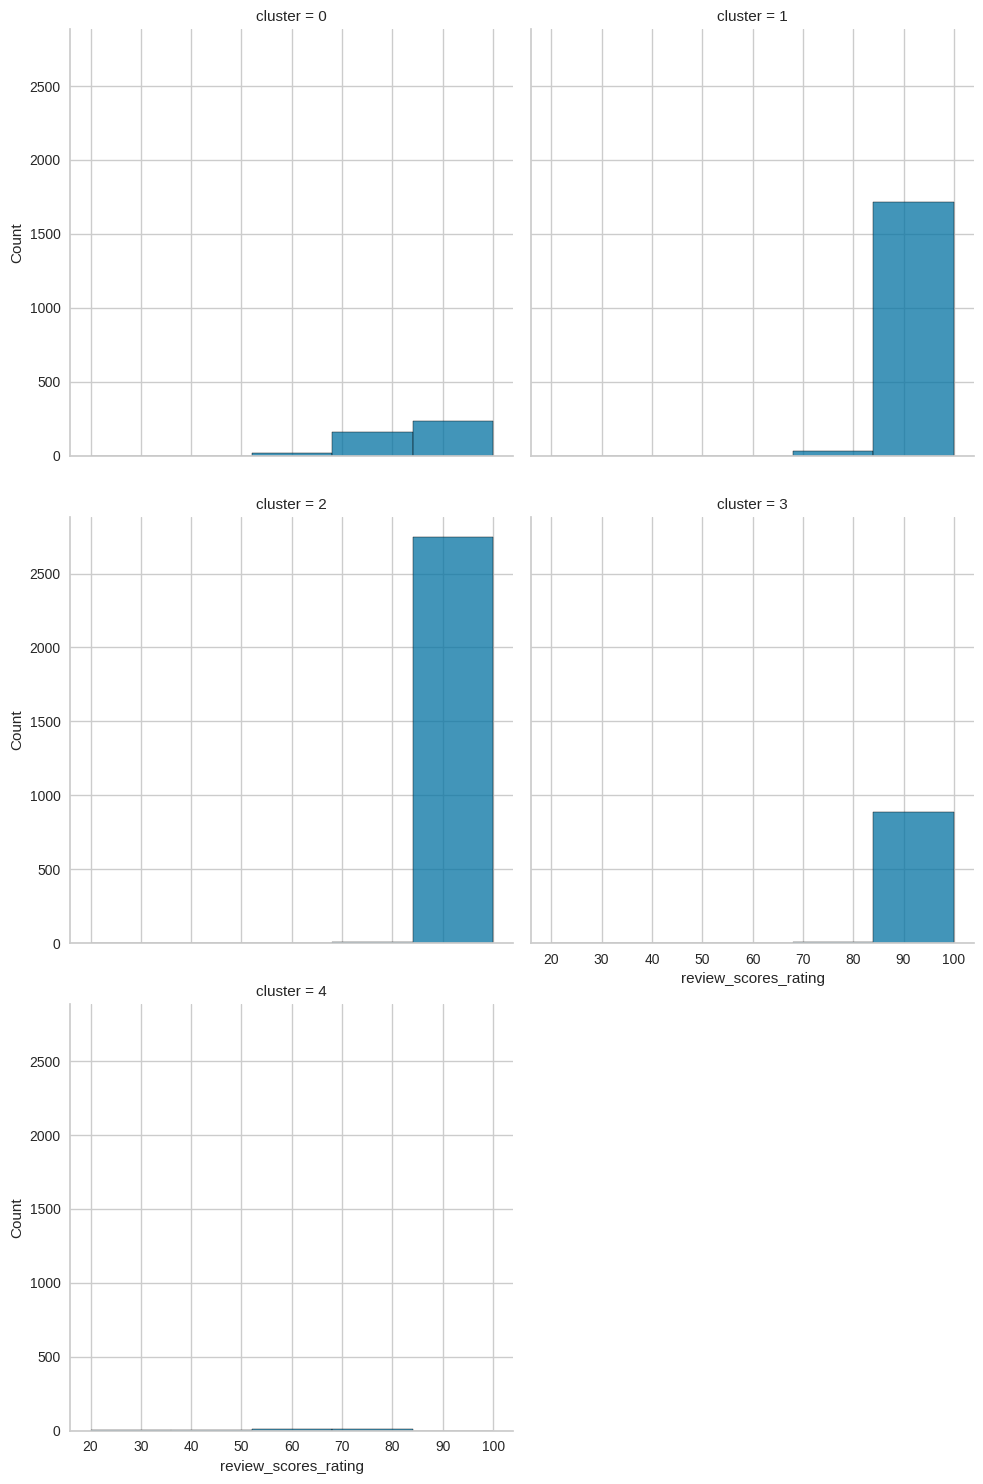

In [ ]:
#Guest Ratings
plt.figure(figsize=(8,4))
print("Guest Ratings")
sns.displot(data=df_clust, x="review_scores_rating", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [ ]:
dfrom = df_clust[['review_scores_rating', 'cluster']]

df_desc1 = dfrom.groupby('cluster').describe()
print(df_desc1)

        review_scores_rating                                         \
                       count       mean        std   min        25%   
cluster                                                               
0                      411.0  84.583942   7.940611  60.0  80.000000   
1                     1746.0  96.327959   3.539610  75.0  95.435735   
2                     2755.0  96.558566   2.889861  80.0  95.435735   
3                      895.0  96.536368   3.495333  60.0  95.435735   
4                       28.0  53.428571  23.003105  20.0  31.250000   

                                   
               50%     75%    max  
cluster                            
0        85.000000   90.00  100.0  
1        95.435735  100.00  100.0  
2        95.435735  100.00  100.0  
3        95.435735  100.00  100.0  
4        60.000000   73.25   80.0  


Booked


<Figure size 800x400 with 0 Axes>

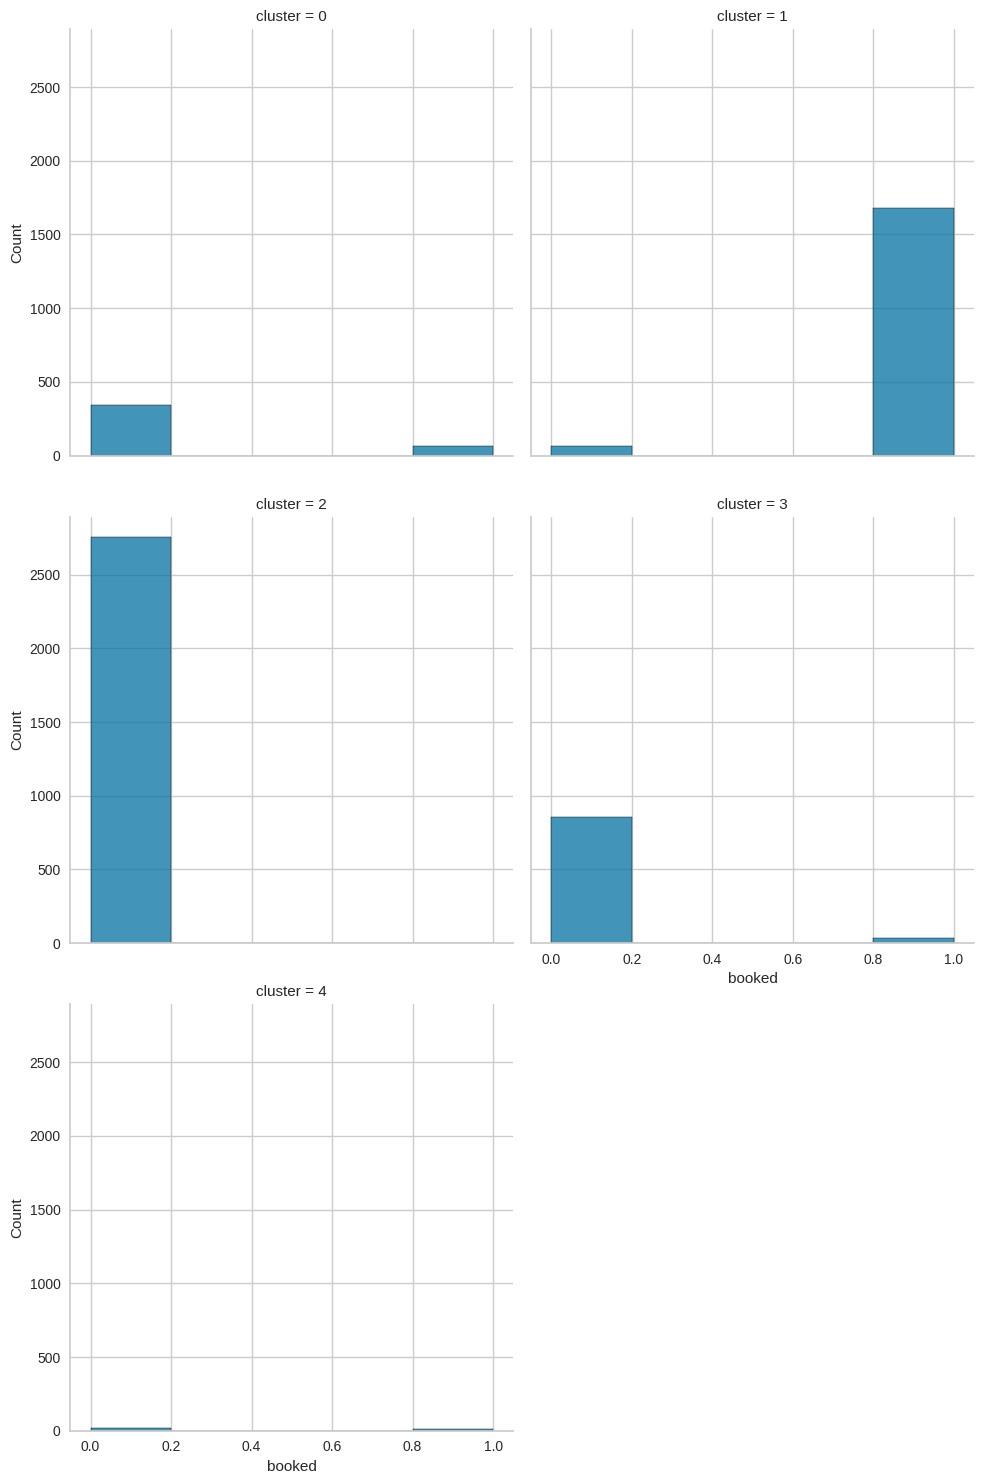

In [ ]:
#Booked
plt.figure(figsize=(8,4))
print("Booked")
sns.displot(data=df_clust, x="booked", bins=5, col='cluster', col_wrap=2, common_bins=True)
plt.show()

In [ ]:
dfrom = df_clust[['booked', 'cluster']]

df_desc1 = dfrom.groupby('cluster').describe()
print(df_desc1)

         booked                                             
          count      mean       std  min  25%  50%  75%  max
cluster                                                     
0         411.0  0.165450  0.372039  0.0  0.0  0.0  0.0  1.0
1        1746.0  0.962772  0.189374  0.0  1.0  1.0  1.0  1.0
2        2755.0  0.000363  0.019052  0.0  0.0  0.0  0.0  1.0
3         895.0  0.041341  0.199188  0.0  0.0  0.0  0.0  1.0
4          28.0  0.357143  0.487950  0.0  0.0  0.0  1.0  1.0
